# Blood Pressure Data Processing and Plotting
## By Kevin Sukher

Here we import the pressure sensor data from VS Code for filtering and processing. In turn, calculate the systolic pressure, diastolic pressure and heart rate from the blood pressure data.

## Importing Libraries

Importing the necessary libraries and functions for the code.

In [1]:
import numpy as np
import pandas as pd

from scipy.signal import butter, lfilter, find_peaks

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Imported Data

Copying and pasting pressure readings from VS Code into a dataframe array for processing.
Multiple tests have been done and put into separate data arrays, whose results can be viewed by editing `df = data_`.

In [2]:
data1 = [-0.01, -0.06, -0.00, -0.03, -0.02, -0.03, -0.05, -0.02, -0.03, -0.08, -0.04, -0.03, -0.05, -0.00, -0.07, -0.06, -0.04, -0.03, -0.05, -0.02, -0.07, -0.08, -0.03, -0.06, -0.03, -0.10, -0.06, -0.07, -0.04, -0.02, -0.10, -0.04, -0.11, -0.06, -0.06, -0.01, -0.07, -0.12, -0.05, -0.08, -0.07, -0.13, -0.08, -0.07, -0.06, -0.12, -0.14, -0.09, -0.10, -0.07, -0.09, -0.06, -0.05, -0.10, -0.03, -0.04, -0.04, -0.10, -0.09, -0.07, -0.09, -0.10, -0.13, -0.15, -0.10, -0.08, -0.06, -0.08, -0.14, -0.13, -0.16, -0.13, -0.14, -0.17, -0.17, -0.22, -0.19, -0.26, -0.29, -0.29, -0.28, -0.23, -0.28, -0.28, -0.23, -0.26, -0.26, -0.27, -0.31, -0.27, -0.26, -0.27, -0.30, -0.32, -0.33, -0.32, -0.30, -0.36, -0.30, -0.35, -0.32, -0.32, -0.34, -0.33, -0.37, -0.37, -0.35, -0.32, -0.33, -0.35, -0.37, -0.34, -0.36, -0.34, -0.39, -0.42, -0.37, -0.40, -0.42, -0.38, -0.40, -0.38, -0.39, -0.36, -0.39, -0.38, -0.38, -0.38, -0.34, -0.32, -0.28, -0.33, -0.33, -0.32, -0.34, -0.33, -0.39, -0.44, -0.46, -0.46, -0.49, -0.46, -0.50, -0.48, -0.46, -0.54, -0.53, -0.47, -0.50, -0.48, -0.47, -0.44, -0.47, -0.43, -0.47, -0.45, -0.47, -0.44, -0.43, -0.43, -0.48, -0.47, -0.43, -0.46, -0.43, -0.42, -0.41, -0.52, -0.46, -0.46, -0.45, -0.50, -0.45, -0.44, -0.46, -0.45, -0.47, -0.43, -0.42, -0.44, -0.40, -0.29, -0.25, -0.11, 0.08, 0.21, 0.34, 0.47, 0.68, 0.82, 1.01, 1.15, 1.24, 1.33, 1.45, 1.50, 1.53, 1.51, 1.60, 1.54, 1.56, 1.57, 1.55, 1.47, 1.45, 1.39, 1.39, 1.39, 1.34, 1.31, 1.31, 1.33, 1.32, 1.30, 1.27, 1.28, 1.25, 1.23, 1.22, 1.21, 1.18, 1.19, 1.24, 1.16, 1.16, 1.16, 1.18, 1.22, 1.22, 1.32, 1.40, 1.53, 1.60, 1.78, 1.79, 1.87, 1.97, 2.04, 2.14, 2.18, 2.25, 2.30, 2.35, 2.42, 2.42, 2.47, 2.55, 2.54, 2.57, 2.54, 2.47, 2.28, 2.28, 2.26, 2.21, 2.16, 2.11, 2.09, 2.03, 1.98, 1.94, 1.89, 1.88, 1.85, 1.78, 1.78, 1.79, 1.82, 1.76, 1.76, 1.75, 1.74, 1.82, 1.89, 1.99, 2.02, 2.12, 2.23, 2.34, 2.39, 2.54, 2.58, 2.71, 2.77, 2.88, 2.96, 3.05, 3.11, 3.17, 3.15, 3.19, 3.23, 3.13, 3.06, 3.09, 3.04, 3.05, 3.05, 2.96, 3.00, 2.94, 2.88, 2.86, 2.82, 2.81, 2.82, 2.85, 2.79, 2.82, 2.83, 2.80, 2.80, 2.83, 2.84, 2.91, 3.02, 3.10, 3.20, 3.35, 3.49, 3.66, 
3.74, 3.94, 4.05, 4.19, 4.33, 4.42, 4.47, 4.48, 4.53, 4.52, 4.48, 4.38, 4.38, 4.34, 4.31, 4.29, 4.25, 4.25, 4.24, 4.20, 4.16, 4.14, 4.12, 4.08, 4.07, 4.09, 4.05, 4.04, 4.00, 4.04, 4.07, 4.12, 4.16, 4.25, 4.40, 4.53, 4.73, 4.83, 5.00, 5.19, 5.38, 5.56, 5.72, 5.88, 6.04, 6.21, 6.38, 6.53, 6.64, 6.81, 6.86, 6.84, 6.85, 6.83, 6.76, 6.70, 6.64, 6.62, 6.65, 6.57, 6.60, 6.46, 6.49, 6.41, 6.43, 6.45, 6.43, 6.40, 6.39, 6.41, 6.39, 6.41, 6.36, 6.33, 6.31, 6.34, 6.31, 6.38, 6.43, 6.54, 7.63, 7.90, 8.13, 8.46, 8.73, 9.04, 9.38, 9.64, 9.95, 10.24, 10.47, 10.69, 10.81, 10.85, 10.81, 10.74, 10.65, 10.52, 10.40, 10.34, 10.28, 10.17, 10.16, 10.09, 10.07, 9.99, 9.92, 9.89, 9.84, 9.82, 9.74, 9.75, 9.67, 9.67, 9.66, 9.63, 9.63, 9.57, 9.63, 9.83, 10.05, 10.36, 10.71, 11.12, 11.50, 11.89, 12.33, 12.81, 13.21, 13.64, 14.91, 14.93, 14.79, 14.71, 14.60, 14.49, 14.37, 14.29, 14.21, 14.17, 14.06, 14.01, 13.95, 13.85, 13.80, 13.72, 13.73, 13.62, 13.61, 13.57, 13.52, 13.47, 13.40, 13.36, 13.32, 13.36, 13.27, 13.25, 13.18, 13.17, 13.21, 13.32, 13.60, 14.00, 14.61, 15.19, 15.71, 16.26, 16.91, 17.49, 18.14, 18.80, 19.45, 20.06, 20.72, 21.31, 21.79, 22.10, 22.37, 22.39, 21.30, 21.17, 21.07, 20.90, 20.82, 20.64, 20.53, 20.39, 20.33, 20.20, 20.15, 20.01, 19.96, 19.92, 19.86, 19.83, 19.84, 19.80, 19.84, 19.74, 19.76, 19.70, 19.72, 19.74, 19.89, 20.22, 20.65, 21.34, 22.04, 22.77, 23.55, 24.31, 25.02, 25.76, 26.55, 27.33, 28.09, 28.75, 29.31, 29.84, 30.24, 30.42, 30.49, 30.38, 30.09, 29.74, 29.53, 29.31, 29.15, 29.00, 28.26, 28.20, 28.07, 27.97, 27.84, 27.75, 27.64, 27.55, 27.49, 27.44, 27.37, 27.34, 27.26, 27.23, 27.15, 27.18, 27.40, 27.77, 28.47, 29.31, 30.28, 31.25, 32.22, 33.27, 34.30, 35.32, 
36.39, 37.45, 38.46, 39.41, 40.30, 41.02, 41.56, 41.89, 42.05, 42.00, 41.79, 41.43, 41.09, 40.91, 40.72, 40.54, 40.40, 40.27, 40.15, 40.04, 39.82, 39.71, 39.59, 39.43, 38.86, 38.72, 38.66, 38.56, 38.54, 38.48, 38.41, 38.34, 38.33, 38.50, 39.21, 40.23, 41.55, 42.95, 44.30, 45.64, 46.91, 48.18, 49.40, 50.47, 51.48, 52.27, 52.80, 53.14, 53.23, 53.07, 52.66, 52.17, 51.79, 51.56, 51.34, 51.12, 50.93, 50.77, 50.59, 50.44, 50.23, 50.11, 49.98, 49.80, 49.70, 49.50, 49.37, 49.26, 49.12, 48.97, 48.85, 48.77, 48.62, 48.55, 49.86, 51.27, 52.84, 54.54, 56.18, 57.73, 59.33, 60.76, 62.28, 63.56, 64.88, 65.95, 66.85, 67.51, 67.92, 67.99, 67.82, 67.36, 66.79, 66.47, 66.11, 65.85, 65.61, 65.31, 65.10, 64.86, 64.62, 64.36, 64.17, 63.94, 63.74, 63.61, 63.47, 63.30, 63.19, 63.05, 62.92, 62.84, 62.70, 62.65, 62.55, 62.49, 62.45, 62.41, 62.33, 62.35, 62.86, 64.03, 65.58, 67.45, 76.30, 77.80, 79.19, 80.39, 81.46, 82.19, 82.66, 82.89, 82.78, 82.37, 81.74, 81.32, 80.90, 80.59, 80.28, 79.99, 79.78, 79.53, 79.32, 79.16, 78.97, 78.73, 78.56, 78.41, 78.29, 78.19, 78.17, 78.19, 78.30, 78.39, 78.44, 78.45, 78.42, 78.38, 78.36, 78.75, 80.07, 81.82, 83.98, 86.16, 88.32, 90.46, 92.50, 94.50, 96.24, 98.01, 99.30, 100.27, 100.83, 101.08, 98.50, 97.98, 97.48, 97.00, 96.59, 96.21, 95.86, 95.52, 95.13, 94.86, 94.53, 94.22, 93.97, 93.69, 93.40, 93.16, 92.95, 92.66, 92.47, 92.25, 92.03, 91.82, 91.63, 91.40, 91.28, 91.04, 90.92, 91.03, 92.03, 93.64, 95.53, 97.66, 99.89, 101.93, 103.99, 105.90, 107.69, 109.34, 110.75, 111.96, 112.91, 113.48, 113.82, 113.83, 113.62, 113.16, 112.66, 112.38, 112.14, 112.04, 111.60, 111.44, 111.41, 111.22, 111.06, 110.92, 110.68, 110.51, 110.40, 110.22, 110.07, 109.91, 109.77, 109.66, 109.59, 109.41, 109.32, 109.13, 109.06, 109.36, 110.53, 112.28, 114.30, 116.47, 118.64, 120.75, 122.69, 124.65, 126.33, 127.73, 128.80, 129.53, 129.86, 129.93, 129.63, 129.06, 128.61, 128.26, 127.97, 127.65, 127.49, 127.27, 127.06, 126.83, 126.65, 126.48, 126.31, 126.13, 125.98, 125.80, 125.07, 124.95, 124.80, 124.70, 124.63, 124.48, 124.44, 124.28, 124.23, 124.15, 124.05, 124.08, 124.49, 125.33, 126.44, 127.89, 129.42, 131.10, 132.80, 134.43, 136.01, 137.43, 138.74, 139.87, 140.72, 141.27, 141.51, 141.47, 141.10, 140.52, 140.18, 139.87, 139.57, 139.32, 139.05, 138.89, 138.68, 138.53, 138.32, 138.23, 138.02, 137.85, 137.71, 137.58, 137.47, 137.34, 137.26, 137.12, 137.01, 136.94, 137.05, 138.35, 139.91, 141.77, 143.80, 145.89, 147.93, 149.82, 151.60, 153.21, 154.49, 155.39, 155.90, 156.08, 155.90, 155.47, 154.98, 154.67, 
154.34, 154.11, 153.85, 153.68, 153.50, 153.30, 153.11, 152.96, 152.81, 152.64, 152.53, 152.39, 152.23, 152.11, 151.92, 151.81, 151.69, 151.58, 151.45, 151.40, 151.33, 151.32, 151.30, 151.35, 151.33, 151.33, 151.33, 151.24, 151.18, 151.16, 151.68, 152.97, 163.51, 165.44, 167.23, 168.85, 170.15, 171.09, 171.65, 171.79, 171.51, 171.02, 170.58, 170.22, 169.98, 169.64, 169.44, 169.22, 169.07, 168.85, 168.66, 168.50, 168.33, 168.20, 168.00, 167.88, 167.71, 167.57, 167.40, 167.29, 167.15, 167.03, 166.89, 166.76, 166.72, 166.53, 166.46, 166.32, 166.22, 166.19, 166.06, 166.04, 166.52, 167.83, 169.57, 171.62, 173.81, 176.09, 178.25, 180.30, 182.33, 184.15, 188.87, 188.59, 188.04, 187.64, 187.24, 187.02, 186.79, 186.59, 186.44, 186.33, 186.17, 186.01, 185.84, 185.62, 185.44, 185.22, 185.06, 184.83, 184.69, 184.50, 184.28, 184.13, 184.05, 183.85, 183.73, 183.68, 183.55, 183.49, 183.30, 183.27, 183.19, 183.07, 182.94, 182.87, 182.79, 182.72, 182.62, 182.55, 182.43, 182.65, 183.37, 184.78, 186.55, 188.64, 190.90, 193.07, 195.06, 196.88, 198.64, 200.17, 202.78, 202.26, 201.83, 201.53, 201.18, 200.92, 200.71, 200.51, 200.32, 200.10, 199.92, 199.74, 199.62, 199.48, 199.31, 199.11, 199.02, 198.87, 198.74, 198.62, 198.51, 198.37, 198.24, 198.15, 198.09, 197.99, 197.87, 197.79, 197.72, 197.70, 197.64, 197.63, 197.57, 197.55, 197.52, 197.40, 197.32, 197.23, 197.11, 197.11, 196.92, 196.82, 196.77, 196.69, 196.61, 196.57, 196.48, 196.41, 196.33, 196.32, 195.92, 195.87, 195.82, 195.79, 195.71, 195.64, 195.59, 195.56, 195.42, 195.44, 195.39, 195.31, 195.33, 195.26, 195.23, 195.14, 195.10, 195.02, 194.97, 194.93, 194.82, 194.80, 194.76, 194.69, 194.67, 194.66, 194.59, 194.57, 194.48, 
194.44, 194.37, 194.38, 194.28, 194.24, 194.19, 194.11, 194.07, 194.04, 194.00, 193.92, 193.93, 193.86, 193.88, 193.80, 193.77, 193.77, 193.76, 193.74, 193.70, 193.67, 193.78, 193.75, 193.75, 193.70, 193.62, 193.59, 193.54, 193.50, 193.40, 193.36, 193.27, 193.24, 193.18, 193.18, 193.09, 193.08, 193.09, 193.05, 193.04, 193.02, 192.98, 192.94, 192.86, 192.79, 192.84, 192.79, 192.76, 192.75, 192.70, 192.66, 192.65, 192.61, 192.59, 192.57, 192.53, 192.54, 192.52, 192.49, 192.46, 192.43, 192.40, 192.33, 192.35, 192.29, 192.24, 192.23, 192.16, 192.17, 192.13, 192.14, 191.94, 191.89, 191.86, 191.77, 191.69, 191.56, 191.49, 191.42, 191.32, 191.27, 191.19, 191.13, 191.02, 191.00, 190.87, 190.81, 190.77, 190.66, 190.67, 190.63, 190.62, 190.61, 190.55, 190.51, 190.51, 190.41, 190.37, 190.31, 190.22, 190.12, 190.02, 189.92, 189.81, 189.78, 189.67, 189.56, 189.46, 189.40, 189.26, 189.21, 189.08, 188.97, 188.87, 188.72, 188.61, 188.47, 188.33, 188.20, 188.08, 187.95, 187.09, 186.94, 186.70, 186.53, 186.37, 186.17, 185.93, 185.72, 185.43, 185.22, 185.04, 184.78, 184.60, 184.41, 184.18, 183.94, 183.73, 183.53, 183.27, 183.15, 182.92, 182.75, 182.54, 182.32, 182.16, 181.99, 181.85, 181.66, 181.51, 181.32, 181.16, 180.96, 180.84, 180.68, 180.48, 180.37, 180.24, 180.04, 179.90, 179.78, 179.65, 179.52, 179.36, 179.30, 179.20, 179.14, 179.10, 178.97, 178.95, 178.77, 178.01, 177.82, 177.63, 177.47, 177.31, 177.14, 176.97, 176.78, 176.68, 176.57, 176.37, 176.23, 176.11, 175.91, 175.71, 175.50, 175.38, 175.23, 175.16, 175.00, 174.84, 174.70, 174.52, 174.39, 174.25, 174.14, 173.98, 173.85, 173.73, 173.53, 173.46, 173.26, 173.13, 172.94, 172.80, 172.64, 172.50, 172.34, 172.18, 172.06, 
171.90, 171.74, 171.57, 171.46, 171.33, 171.19, 171.05, 170.91, 170.73, 170.62, 169.91, 169.77, 169.63, 169.52, 169.33, 169.21, 169.11, 168.99, 168.83, 168.67, 168.57, 168.43, 168.32, 168.14, 168.10, 168.03, 168.00, 167.92, 167.86, 167.80, 167.65, 167.53, 167.35, 167.20, 167.06, 166.92, 166.76, 166.63, 166.43, 166.24, 166.13, 165.97, 165.86, 165.72, 165.56, 165.43, 165.36, 165.23, 165.11, 164.93, 164.76, 164.61, 164.48, 164.39, 164.28, 164.12, 163.97, 163.85, 163.74, 163.61, 162.95, 162.83, 162.70, 162.56, 162.42, 162.27, 162.13, 161.97, 161.81, 161.70, 161.59, 161.41, 161.31, 161.16, 161.03, 160.85, 160.76, 160.65, 160.48, 160.32, 160.22, 160.10, 159.99, 159.79, 159.67, 159.55, 159.42, 159.33, 159.15, 159.02, 158.87, 158.79, 158.65, 158.50, 158.33, 158.25, 158.08, 158.01, 157.83, 157.73, 157.61, 157.54, 157.49, 157.43, 157.41, 157.33, 157.25, 157.18, 157.06, 156.93, 156.16, 155.96, 155.83, 155.71, 155.54, 155.45, 155.32, 155.20, 155.02, 154.87, 154.75, 154.63, 154.39, 154.35, 154.17, 154.04, 153.93, 153.81, 153.69, 153.58, 153.44, 153.36, 153.19, 153.10, 152.96, 152.84, 152.73, 152.60, 152.53, 152.35, 152.21, 152.09, 151.94, 151.83, 151.68, 151.51, 151.44, 151.27, 151.11, 151.05, 150.90, 150.76, 150.63, 150.53, 150.37, 150.25, 150.17, 149.97, 149.90, 149.76, 149.17, 149.03, 148.93, 148.79, 148.68, 148.54, 148.44, 148.36, 148.22, 148.11, 147.97, 147.87, 147.82, 147.74, 147.65, 147.63, 147.60, 147.61, 147.53, 147.48, 147.34, 147.22, 147.07, 146.92, 146.75, 146.55, 146.49, 146.31, 146.15, 146.00, 145.93, 145.76, 145.69, 145.52, 145.41, 145.27, 145.18, 145.09, 144.90, 144.77, 144.63, 144.56, 144.42, 144.38, 144.28, 144.16, 144.09, 143.96, 143.89, 143.74, 143.23, 
143.13, 142.98, 142.89, 142.73, 142.63, 142.49, 142.38, 142.24, 142.13, 142.06, 141.94, 141.79, 141.68, 141.58, 141.44, 141.30, 141.22, 141.07, 141.02, 140.90, 140.75, 140.64, 140.50, 140.39, 140.30, 140.17, 140.12, 139.95, 139.85, 139.74, 139.64, 139.52, 139.39, 139.28, 139.22, 139.07, 138.97, 138.85, 138.80, 138.76, 138.76, 138.75, 138.70, 138.68, 138.64, 138.56, 138.47, 138.36, 138.22, 137.49, 137.28, 137.17, 137.05, 136.98, 136.86, 136.75, 136.64, 136.51, 136.38, 136.27, 136.14, 136.01, 135.93, 135.86, 135.76, 135.67, 135.55, 135.45, 135.38, 135.25, 135.15, 135.03, 134.91, 134.87, 134.75, 134.62, 134.51, 134.42, 134.30, 134.21, 134.09, 134.02, 133.88, 133.79, 133.64, 133.56, 133.46, 133.37, 133.23, 133.12, 133.02, 132.93, 132.83, 132.68, 132.61, 132.49, 132.40, 132.29, 132.17, 131.66, 131.56, 131.44, 131.32, 131.23, 131.15, 131.07, 130.93, 130.82, 130.76, 130.64, 130.62, 130.61, 130.59, 130.62, 130.57, 130.59, 130.55, 130.48, 130.43, 130.38, 130.20, 130.11, 129.94, 129.79, 129.67, 129.48, 129.36, 129.14, 129.07, 128.91, 128.77, 128.67, 128.61, 128.45, 128.33, 128.24, 128.11, 128.04, 127.88, 127.80, 127.71, 127.62, 127.50, 127.38, 127.32, 127.22, 127.14, 127.05, 126.93, 126.40, 126.25, 126.15, 126.05, 125.93, 125.85, 125.68, 125.60, 125.52, 125.36, 125.30, 125.17, 125.08, 125.00, 124.86, 124.79, 124.69, 124.57, 124.42, 124.39, 124.28, 124.21, 124.08, 124.00, 123.89, 123.82, 123.69, 123.60, 123.50, 123.43, 123.31, 123.20, 123.09, 123.00, 122.88, 122.84, 122.73, 122.68, 122.63, 122.61, 122.63, 122.57, 122.60, 122.58, 122.56, 122.58, 122.49, 122.41, 122.36, 122.25, 121.53, 121.40, 121.23, 121.07, 121.00, 120.87, 120.71, 120.56, 120.44, 120.32, 120.16, 120.08, 
119.95, 119.88, 119.84, 119.74, 119.70, 119.60, 119.49, 119.43, 119.33, 119.25, 119.12, 119.10, 118.92, 118.91, 118.82, 118.67, 118.53, 118.45, 118.35, 118.25, 118.17, 118.06, 117.95, 117.91, 117.78, 117.70, 117.58, 117.51, 117.44, 117.34, 117.28, 117.20, 117.10, 117.05, 116.98, 116.90, 116.79, 116.68, 116.21, 116.15, 116.03, 115.94, 115.87, 115.80, 115.71, 115.62, 115.55, 115.53, 115.49, 115.55, 115.59, 115.59, 115.62, 115.64, 115.63, 115.61, 115.59, 115.55, 115.44, 115.37, 115.19, 115.10, 114.95, 114.78, 114.61, 114.48, 114.35, 114.19, 114.06, 113.94, 113.81, 113.63, 113.53, 113.38, 113.27, 113.19, 113.08, 113.04, 112.95, 112.91, 112.79, 112.73, 112.68, 112.60, 112.47, 112.43, 112.37, 112.21, 111.70, 111.62, 111.51, 111.42, 111.32, 111.18, 111.10, 111.03, 110.95, 110.83, 110.79, 110.70, 110.60, 110.52, 110.45, 110.35, 110.23, 110.18, 110.07, 110.02, 109.90, 109.84, 109.79, 109.69, 109.65, 109.48, 109.44, 109.36, 109.27, 109.17, 109.08, 108.97, 108.96, 108.90, 108.85, 108.88, 108.96, 108.97, 109.05, 109.08, 109.11, 109.18, 109.19, 109.25, 109.13, 109.10, 109.00, 108.85, 108.76, 108.63, 107.99, 107.85, 107.79, 107.68, 107.54, 107.39, 107.28, 107.16, 107.06, 106.89, 106.82, 106.72, 106.62, 106.54, 106.44, 106.36, 106.27, 106.20, 106.14, 106.05, 105.95, 105.86, 105.79, 105.70, 105.58, 105.48, 105.39, 105.29, 105.15, 105.09, 104.97, 104.89, 104.80, 104.65, 104.62, 104.49, 104.41, 104.37, 104.25, 104.19, 104.12, 104.04, 103.93, 103.90, 103.79, 103.70, 103.63, 103.57, 103.44, 103.42, 102.99, 102.93, 102.85, 102.78, 102.77, 102.81, 102.82, 102.92, 102.97, 103.05, 103.10, 103.19, 103.22, 103.28, 103.23, 103.16, 103.03, 102.95, 102.83, 102.70, 102.61, 102.48, 102.40, 
102.26, 102.20, 102.15, 102.00, 101.95, 101.85, 101.68, 101.57, 101.42, 101.32, 101.22, 101.11, 101.01, 100.87, 100.78, 100.74, 100.68, 100.63, 100.51, 100.44, 100.34, 100.27, 100.18, 100.07, 99.99, 99.87, 99.84, 99.27, 99.16, 99.08, 98.95, 98.85, 98.84, 98.82, 98.72, 98.68, 98.57, 98.59, 98.49, 98.38, 98.34, 98.29, 98.25, 98.15, 98.06, 97.94, 97.81, 97.75, 97.66, 97.56, 97.49, 97.41, 97.32, 97.23, 97.16, 97.06, 97.01, 96.94, 96.93, 96.86, 96.91, 96.93, 97.04, 97.11, 97.23, 97.31, 97.41, 97.49, 97.41, 97.38, 97.34, 97.25, 97.12, 97.04, 96.95, 96.83, 96.76, 96.36, 96.27, 96.13, 96.03, 95.91, 95.82, 95.72, 95.62, 95.53, 95.40, 
95.34, 95.27, 95.19, 95.10, 95.02, 95.00, 94.91, 94.89, 94.78, 94.69, 94.60, 94.51, 94.42, 94.30, 94.24, 94.16, 94.05, 93.94, 93.86, 93.75, 93.68, 93.55, 93.44, 93.35, 93.27, 93.23, 93.11, 92.99, 92.89, 92.84, 92.72, 92.68, 92.58, 92.49, 92.42, 92.38, 92.29, 92.18, 92.13, 92.07, 91.70, 91.68, 91.63, 91.53, 91.46, 91.42, 91.28, 91.21, 91.17, 91.10, 91.05, 90.97, 90.97, 90.88, 90.95, 91.04, 91.10, 91.24, 91.36, 91.50, 91.61, 91.63, 91.68, 91.54, 91.52, 91.46, 91.39, 91.28, 91.21, 91.06, 91.04, 90.95, 90.89, 90.84, 90.74, 90.70, 90.60, 90.54, 90.42, 90.37, 90.22, 90.16, 90.05, 90.02, 89.91, 89.83, 89.82, 89.71, 89.65, 89.56, 89.22, 89.13, 89.05, 88.97, 88.89, 88.80, 88.69, 88.61, 88.51, 88.44, 88.33, 88.23, 88.14, 88.01, 87.94, 87.82, 87.77, 87.68, 87.58, 87.52, 87.42, 87.39, 87.29, 87.19, 87.12, 87.06, 86.95, 86.92, 86.82, 86.73, 86.69, 86.63, 86.50, 86.48, 86.42, 86.26, 86.23, 86.17, 86.13, 86.04, 85.97, 85.94, 85.83, 85.79, 85.70, 85.63, 85.54, 85.43, 85.42, 85.33, 85.14, 85.22, 85.37, 85.42, 85.53, 85.66, 85.70, 85.71, 85.70, 85.63, 85.59, 85.49, 85.44, 85.40, 85.27, 85.19, 85.15, 85.07, 85.01, 84.94, 84.88, 84.81, 84.76, 84.63, 84.57, 84.45, 84.37, 84.33, 84.22, 84.16, 84.08, 84.05, 83.96, 83.89, 83.82, 83.70, 83.66, 83.63, 83.57, 83.47, 83.41, 83.33, 83.27, 83.19, 83.07, 83.02, 82.95, 82.86, 82.76, 82.67, 82.21, 82.10, 82.03, 81.91, 81.85, 81.75, 81.71, 81.59, 81.51, 81.44, 81.36, 81.27, 81.16, 81.13, 81.05, 80.96, 80.92, 80.84, 80.75, 80.67, 80.62, 
80.59, 80.48, 80.40, 80.29, 80.26, 80.13, 80.07, 80.00, 79.99, 79.88, 79.90, 79.86, 79.96, 80.07, 80.16, 80.28, 80.32, 80.34, 80.34, 80.30, 80.23, 80.19, 80.13, 80.12, 80.04, 80.02, 79.95, 79.88, 79.86, 79.54, 79.41, 79.30, 79.18, 79.13, 79.02, 78.97, 78.88, 78.86, 78.69, 78.65, 78.58, 78.50, 78.42, 78.38, 78.29, 78.19, 78.12, 78.05, 77.95, 77.89, 77.81, 77.85, 77.70, 77.58, 77.47, 77.41, 77.27, 77.24, 77.15, 77.09, 76.98, 76.89, 76.84, 76.71, 76.63, 76.54, 76.48, 76.35, 76.30, 76.25, 76.16, 76.05, 76.00, 75.95, 75.85, 75.81, 75.71, 75.65, 75.58, 75.23, 75.12, 75.08, 75.02, 74.90, 74.89, 74.83, 74.86, 74.94, 75.06, 75.13, 75.22, 75.22, 75.31, 75.26, 75.21, 75.18, 75.21, 75.13, 75.08, 75.06, 75.06, 74.91, 74.85, 74.78, 74.71, 74.65, 74.52, 74.48, 74.44, 74.31, 74.17, 74.06, 73.94, 73.87, 73.75, 73.66, 73.57, 73.48, 73.38, 73.37, 73.24, 73.18, 73.11, 73.03, 72.94, 72.85, 72.81, 72.72, 72.58, 72.22, 72.11, 72.05, 71.95, 71.84, 71.72, 71.68, 71.60, 71.50, 71.40, 71.33, 71.21, 71.13, 71.08, 70.95, 70.91, 70.85, 70.78, 70.70, 70.65, 70.55, 70.53, 70.40, 70.34, 70.23, 70.18, 70.11, 70.07, 70.01, 69.93, 69.82, 69.77, 69.71, 69.62, 69.58, 69.55, 69.53, 69.59, 69.66, 69.74, 69.84, 69.78, 69.79, 69.79, 69.76, 69.79, 69.75, 69.70, 69.65, 69.62, 69.24, 69.17, 69.08, 69.00, 68.91, 68.86, 68.72, 68.66, 68.51, 68.44, 68.35, 68.28, 68.15, 68.09, 68.02, 67.94, 67.87, 67.77, 67.73, 67.64, 67.63, 67.52, 67.47, 67.37, 67.28, 67.24, 67.15, 67.12, 67.00, 66.97, 66.81, 66.75, 
66.68, 66.60, 66.53, 66.48, 66.36, 66.30, 66.18, 66.15, 66.09, 66.02, 65.94, 65.82, 65.79, 65.72, 65.68, 65.56, 65.47, 65.45, 65.10, 65.01, 64.97, 64.88, 64.84, 64.76, 64.74, 64.62, 64.60, 64.55, 64.46, 64.41, 64.42, 64.33, 64.37, 64.47, 64.53, 64.54, 64.64, 64.65, 64.65, 64.71, 64.70, 64.66, 64.61, 64.59, 64.62, 64.50, 64.43, 64.35, 64.28, 64.22, 64.12, 64.05, 64.00, 63.89, 63.81, 63.75, 63.62, 63.52, 63.39, 63.34, 63.29, 63.23, 63.15, 63.08, 63.01, 62.94, 62.90, 62.89, 62.61, 62.51, 62.45, 62.43, 62.35, 62.25, 62.20, 62.12, 62.09, 61.98, 61.90, 61.87, 61.83, 61.73, 61.67, 61.64, 61.56, 61.48, 61.47, 61.37, 61.32, 61.27, 61.23, 61.18, 61.08, 61.00, 61.01, 60.94, 60.86, 60.87, 60.80, 60.76, 60.68, 60.65, 60.57, 60.56, 60.48, 60.41, 60.41, 60.31, 60.26, 60.21, 60.13, 60.11, 60.07, 59.98, 59.93, 59.95, 59.98, 60.00, 60.14, 60.12, 60.14, 60.11, 60.11, 60.06, 60.04, 59.97, 59.91, 59.86, 59.81, 59.67, 59.62, 59.57, 59.52, 59.45, 59.34, 59.29, 59.19, 59.14, 59.08, 59.01, 58.92, 58.86, 58.87, 58.76, 58.73, 58.69, 58.62, 58.60, 58.52, 58.49, 58.42, 58.39, 58.33, 58.29, 58.24, 58.16, 58.12, 58.09, 58.04, 57.99, 57.91, 57.87, 57.83, 57.79, 57.72, 57.67, 57.59, 57.51, 57.29, 57.21, 57.15, 57.14, 57.09, 57.04, 56.95, 56.94, 56.91, 56.84, 56.84, 56.76, 56.74, 56.67, 56.69, 56.66, 56.62, 56.55, 56.54, 56.48, 56.41, 56.38, 56.34, 56.26, 56.25, 56.25, 56.25, 56.31, 56.32, 56.39, 56.39, 56.40, 56.40, 56.43, 56.43, 56.42, 56.37, 56.40, 56.30, 56.28, 56.17, 56.17, 56.07, 
56.01, 55.89, 55.84, 55.79, 55.70, 55.66, 55.53, 55.25, 55.16, 55.13, 55.07, 54.99, 54.96, 54.91, 54.86, 54.83, 54.79, 54.72, 54.63, 54.62, 54.55, 54.51, 54.47, 54.39, 54.30, 54.22, 54.21, 54.09, 54.09, 54.01, 53.94, 53.86, 53.83, 53.75, 53.68, 53.62, 53.60, 53.54, 53.48, 53.41, 53.36, 53.27, 53.23, 53.21, 53.17, 53.08, 53.02, 52.95, 52.90, 52.83, 52.82, 52.78, 52.73, 52.69, 52.65, 52.53, 52.53, 52.47, 52.48, 52.53, 52.54, 52.53, 52.54, 52.51, 52.50, 52.43, 52.42, 52.34, 52.34, 52.27, 52.21, 52.13, 52.10, 52.02, 51.95, 51.95, 51.83, 51.79, 51.69, 51.66, 51.57, 51.50, 51.41, 51.32, 51.28, 51.22, 51.22, 51.12, 51.10, 51.03, 50.96, 50.92, 50.88, 50.80, 50.78, 50.73, 50.66, 50.59, 50.55, 50.49, 50.41, 50.38, 50.35, 50.24, 50.20, 50.11, 50.07, 49.83, 49.77, 49.70, 49.60, 49.58, 49.53, 49.47, 49.38, 49.36, 49.29, 49.23, 49.22, 49.15, 49.14, 49.04, 48.97, 48.95, 48.91, 48.87, 48.79, 48.74, 48.70, 48.66, 48.59, 48.61, 48.54, 48.50, 48.50, 48.55, 48.56, 48.56, 48.61, 48.60, 48.61, 48.59, 48.59, 48.54, 48.52, 48.43, 48.42, 48.35, 48.33, 48.25, 48.20, 48.15, 48.06, 48.05, 48.00, 47.91, 47.85, 47.51, 47.47, 47.43, 47.36, 47.29, 47.29, 47.20, 47.14, 47.11, 47.05, 47.06, 46.98, 46.95, 46.91, 46.86, 46.84, 46.75, 46.70, 46.66, 46.64, 46.58, 46.55, 46.42, 46.38, 46.40, 46.29, 46.21, 46.16, 46.16, 46.09, 46.04, 45.98, 45.89, 45.89, 45.83, 45.80, 45.75, 45.68, 45.62, 45.63, 45.55, 45.53, 45.43, 45.41, 45.39, 45.37, 45.26, 45.22, 45.21, 45.14, 44.90, 44.81, 44.79, 44.74, 
44.73, 44.69, 44.62, 44.61, 44.58, 44.53, 44.52, 44.60, 44.67, 44.67, 44.73, 44.72, 44.73, 44.77, 44.74, 44.75, 44.72, 44.69, 44.61, 44.58, 44.50, 44.51, 44.43, 44.36, 44.33, 44.28, 44.24, 44.17, 44.14, 44.04, 44.00, 43.86, 43.82, 43.77, 43.69, 43.62, 43.55, 43.51, 43.47, 43.42, 43.39, 43.39, 43.34, 43.27, 43.21, 43.17, 42.89, 42.91, 42.80, 42.80, 42.74, 42.68, 42.58, 42.62, 42.54, 42.55, 42.51, 42.52, 42.50, 42.48, 42.45, 42.39, 42.34, 42.34, 42.37, 42.30, 42.25, 42.25, 42.22, 42.17, 42.16, 42.13, 42.08, 42.03, 42.02, 42.00, 41.94, 41.90, 41.87, 41.78, 41.77, 41.74, 41.66, 41.57, 41.63, 41.62, 41.62, 41.59, 41.59, 41.57, 41.57, 41.59, 41.54, 41.54, 41.45, 41.43, 41.19, 41.11, 41.04, 40.99, 41.02, 40.90, 40.86, 40.78, 40.75, 40.64, 40.60, 40.56, 40.53, 40.51, 40.46, 40.32, 40.32, 40.32, 40.25, 40.21, 40.17, 40.16, 40.11, 40.06, 40.09, 40.01, 39.99, 39.91, 39.91, 39.80, 39.75, 39.73, 39.72, 39.68, 39.60, 39.56, 39.49, 39.45, 39.44, 39.35, 39.30, 39.32, 39.34, 39.25, 39.24, 39.24, 39.23, 39.21, 39.16, 39.18, 38.99, 38.94, 38.89, 38.88, 38.79, 38.78, 38.71, 38.72, 38.69, 38.62, 38.64, 38.57, 38.57, 38.58, 38.58, 38.61, 38.64, 38.65, 38.67, 38.68, 38.62, 38.64, 38.62, 38.61, 38.58, 38.49, 38.52, 38.47, 38.39, 38.31, 38.28, 38.24, 38.15, 38.16, 38.07, 38.01, 37.98, 37.90, 37.81, 37.67, 37.64, 37.62, 37.55, 37.53, 37.48, 37.42, 37.41, 37.35, 37.35, 37.25, 37.10, 37.04, 37.04, 37.00, 36.95, 36.91, 36.91, 36.84, 36.87, 36.84, 36.86, 36.92, 37.00, 37.03, 37.08, 
37.15, 37.15, 37.16, 37.12, 37.12, 37.09, 37.04, 36.97, 36.93, 36.87, 36.87, 36.77, 36.76, 36.66, 36.62, 36.54, 36.43, 36.37, 36.28, 36.27, 36.17, 36.12, 36.07, 36.02, 35.96, 35.89, 35.84, 35.84, 35.83, 35.82, 35.85, 35.90, 35.89, 35.94, 35.89, 35.91, 35.84, 35.83, 35.77, 35.69, 35.66, 35.60, 35.57, 35.51, 35.43, 35.41, 35.38, 35.32, 35.27, 35.20, 35.21, 35.17, 35.21, 35.17, 35.15, 35.15, 35.15, 35.21, 35.13, 35.17, 35.17, 35.15, 35.16, 35.12, 35.07, 35.06, 34.98, 34.96, 34.91, 34.89, 34.79, 34.77, 34.67, 34.67, 34.58, 34.56, 34.53, 34.52, 34.46, 34.40, 34.34, 34.27, 34.20, 34.13, 34.11, 33.87, 33.83, 33.75, 33.67, 33.68, 33.67, 33.57, 33.55, 33.52, 33.48, 33.40, 33.36, 33.31, 33.32, 33.23, 33.23, 33.19, 33.13, 33.11, 33.07, 33.06, 33.02, 32.98, 32.94, 32.91, 32.92, 32.89, 32.94, 32.94, 32.96, 32.98, 32.98, 32.95, 32.94, 32.91, 32.87, 32.90, 32.84, 32.78, 32.74, 32.70, 32.63, 32.55, 32.52, 32.50, 32.46, 32.41, 32.40, 32.32, 32.29, 32.12, 32.08, 32.03, 31.97, 31.94, 31.92, 31.92, 31.87, 31.86, 31.85, 31.81, 31.79, 31.75, 31.79, 31.68, 31.66, 31.60, 31.58, 31.53, 31.48, 31.47, 31.39, 31.38, 31.34, 31.27, 31.28, 31.31, 31.25, 31.29, 31.21, 31.19, 31.16, 31.16, 31.12, 31.06, 31.07, 31.03, 30.97, 30.94, 30.91, 30.89, 30.87, 30.87, 30.85, 30.87, 30.78, 30.82, 30.79, 30.74, 30.72, 30.53, 30.49, 30.43, 30.39, 30.33, 30.34, 30.30, 30.23, 30.28, 30.30, 30.34, 30.29, 30.32, 30.29, 30.30, 30.28, 30.27, 30.22, 30.18, 30.18, 30.14, 30.09, 30.07, 30.02, 29.95, 29.86, 
29.93, 29.85, 29.83, 29.79, 29.75, 29.71, 29.68, 29.67, 29.65, 29.61, 29.59, 29.51, 29.49, 29.48, 29.43, 29.43, 29.36, 29.35, 29.31, 29.29, 29.26, 29.22, 29.22, 29.14, 29.04, 29.00, 28.95, 28.94, 28.88, 28.87, 28.80, 28.80, 28.71, 28.67, 28.67, 28.61, 28.59, 28.55, 28.48, 28.45, 28.46, 28.39, 28.35, 28.32, 28.32, 28.27, 28.27, 28.25, 28.20, 28.18, 28.13, 28.14, 28.10, 28.07, 28.01, 27.97, 27.99, 27.94, 27.93, 27.89, 27.87, 27.85, 27.75, 27.75, 27.75, 27.78, 27.82, 27.85, 27.83, 27.84, 27.81, 27.79, 27.82, 27.78, 27.57, 27.53, 27.44, 27.45, 27.41, 27.37, 27.36, 27.34, 27.27, 27.22, 27.18, 27.17, 27.14, 27.12, 27.05, 27.06, 27.03, 27.03, 27.05, 26.99, 26.99, 26.96, 26.99, 26.93, 26.95, 26.89, 26.85, 26.83, 26.81, 26.75, 26.72, 26.67, 26.67, 26.63, 26.57, 26.58, 26.57, 26.47, 26.47, 26.41, 26.41, 26.38, 26.33, 26.30, 26.30, 26.27, 26.21, 26.17, 26.16, 26.14, 26.07, 25.99, 25.97, 25.95, 25.97, 25.95, 25.93, 25.92, 25.86, 25.85, 25.82, 25.80, 25.74, 25.75, 25.73, 25.70, 25.78, 25.76, 25.77, 25.80, 25.76, 25.79, 25.80, 25.72, 25.71, 25.69, 25.67, 25.63, 25.60, 25.51, 25.46, 25.45, 25.43, 25.41, 25.28, 25.30, 25.31, 25.26, 25.23, 25.22, 25.15, 25.12, 25.11, 25.06, 25.05, 25.02, 25.01, 24.94, 24.98, 24.93, 24.88, 24.87, 24.82, 24.77, 24.78, 24.74, 24.73, 24.69, 24.66, 24.58, 24.60, 24.57, 24.52, 24.46, 24.42, 24.44, 24.40, 24.34, 24.34, 24.32, 24.28, 24.28, 24.18, 24.22, 24.17, 24.13, 24.10, 24.06, 24.04, 24.03, 24.04, 24.00, 23.97, 23.97, 23.97, 23.86, 23.89, 
23.89, 23.81, 23.81, 23.81, 23.83, 23.87, 23.82, 23.86, 23.86, 23.85, 23.85, 23.82, 23.81, 23.64, 23.59, 23.54, 23.54, 23.48, 23.45, 23.39, 23.40, 23.33, 23.32, 23.28, 23.25, 23.17, 23.16, 23.16, 23.10, 23.12, 23.08, 23.06, 23.01, 23.03, 23.03, 22.95, 22.99, 22.99, 22.95, 22.93, 22.91, 22.85, 22.82, 22.83, 22.77, 22.77, 22.72, 22.70, 22.68, 22.66, 22.64, 22.60, 22.56, 22.55, 22.51, 22.45, 22.47, 22.45, 22.42, 22.37, 22.39, 22.34, 22.30, 22.26, 22.21, 22.18, 22.19, 22.15, 22.13, 22.09, 22.11, 22.10, 22.16, 22.16, 22.18, 22.20, 22.23, 22.11, 22.18, 22.15, 22.14, 22.15, 22.04, 22.06, 22.01, 21.94, 21.95, 21.90, 21.90, 21.86, 21.84, 21.77, 21.78, 21.71, 21.71, 21.64, 21.60, 21.61, 21.55, 21.54, 21.46, 21.48, 21.42, 21.40, 21.36, 21.41, 21.34, 21.33, 21.33, 21.30, 21.24, 21.25, 21.23, 21.13, 21.06, 21.11, 21.04, 21.01, 20.99, 20.97, 20.91, 20.96, 20.91, 20.89, 20.85, 20.84, 20.79, 20.78, 20.73, 20.72, 20.77, 20.65, 20.69, 20.67, 20.66, 20.65, 20.61, 20.59, 20.55, 20.54, 20.55, 20.51, 20.53, 20.59, 20.57, 20.58, 20.59, 20.57, 20.56, 20.51, 20.49, 20.50, 20.46, 20.43, 20.42, 20.42, 20.31, 20.33, 20.28, 20.27, 20.20, 20.22, 20.19, 20.06, 20.02, 19.96, 19.97, 19.98, 19.94, 19.97, 19.93, 19.87, 19.86, 19.89, 19.86, 19.87, 19.81, 19.85, 19.78, 19.78, 19.70, 19.71, 19.72, 19.66, 19.66, 19.61, 19.63, 19.61, 19.57, 19.58, 19.51, 19.52, 19.51, 19.50, 19.38, 19.39, 19.35, 19.38, 19.31, 19.29, 19.26, 19.23, 19.25, 19.23, 19.22, 19.21, 19.20, 19.17, 19.16, 19.14, 19.10, 
19.08, 19.02, 19.13, 19.09, 19.10, 19.08, 19.07, 19.07, 19.02, 19.02, 18.98, 18.96, 18.95, 18.87, 18.85, 18.81, 18.82, 18.75, 18.76, 18.74, 18.70, 18.68, 18.67, 18.64, 18.59, 18.58, 18.54, 18.54, 18.49, 18.55, 18.50, 18.50, 18.50, 18.44, 18.44, 18.39, 18.41, 18.35, 18.32, 18.34, 18.33, 18.30, 18.28, 18.22, 18.22, 18.25, 18.19, 18.20, 18.16, 18.18, 18.11, 18.15, 18.06, 18.02, 17.98, 17.95, 17.95, 17.94, 17.91, 17.95, 17.94, 17.88, 17.91, 17.89, 17.84, 17.78, 17.82, 17.79, 17.77, 17.79, 17.80, 17.73, 17.77, 17.67, 17.72, 17.71, 17.73, 17.72, 17.70, 17.71, 17.73, 17.72, 17.72, 17.73, 17.68, 17.71, 17.64, 17.57, 17.61, 17.62, 17.55, 17.52, 17.53, 17.46, 17.40, 17.41, 17.37, 17.33, 17.32, 17.30, 17.28, 17.28, 17.16, 17.20, 17.15, 17.14, 17.14, 17.08, 17.04, 17.05, 17.01, 16.95, 16.96, 16.95, 16.94, 16.92, 16.90, 16.88, 16.84, 16.83, 16.84, 16.87, 16.84, 16.78, 16.73, 16.75, 16.73, 16.69, 16.69, 16.68, 16.64, 16.65, 16.63, 16.59, 16.62, 16.59, 16.60, 16.59, 16.52, 16.55, 16.46, 16.50, 16.48, 16.47, 16.46, 16.45, 16.49, 16.44, 16.43, 16.39, 16.38, 16.37, 16.38, 16.46, 16.40, 16.37, 16.36, 16.34, 16.29, 16.34, 16.32, 16.28, 16.26, 16.17, 16.14, 16.13, 16.13, 16.07, 16.09, 16.05, 16.07, 16.02, 15.99, 16.01, 15.93, 15.91, 15.91, 15.90, 15.82, 15.85, 15.90, 15.85, 15.83, 15.81, 15.82, 15.79, 15.76, 15.76, 15.71, 15.77, 15.70, 15.71, 15.68, 15.67, 15.63, 15.62, 15.61, 15.57, 15.51, 15.53, 15.55, 15.56, 15.47, 15.46, 15.44, 15.38, 15.35, 15.40, 15.37, 15.34, 15.32, 
15.32, 15.26, 15.23, 15.26, 15.33, 15.26, 15.27, 15.23, 15.20, 15.16, 15.19, 15.18, 15.13, 15.12, 15.12, 15.15, 15.17, 15.16, 15.16, 15.12, 15.18, 15.13, 15.17, 15.17, 15.09, 15.09, 15.09, 15.05, 15.05, 15.02, 15.01, 15.00, 15.00, 14.97, 14.93, 14.94, 14.91, 14.89, 14.90, 14.90]

In [3]:
data2 = [-0.44, -0.45, -0.52, -0.48, -0.48, -0.48, -0.45, -0.48, -0.44, -0.44, -0.51, -0.47, -0.41, -0.48, -0.48, -0.48, -0.47, -0.51, -0.46, -0.48, -0.48, -0.47, -0.48, -0.48, -0.50, -0.47, -0.49, -0.48, -0.46, -0.48, -0.45, -0.52, -0.53, -0.50, -0.48, -0.49, -0.51, -0.52, -0.52, -0.48, -0.51, -0.53, -0.54, -0.50, -0.51, -0.50, -0.51, -0.48, -0.46, -0.50, -0.50, -0.45, -0.49, -0.41, -0.34, -0.09, 0.26, 0.68, 1.00, 1.31, 1.43, 
1.65, 1.77, 1.92, 1.96, 2.10, 2.21, 2.36, 2.45, 2.58, 2.69, 2.68, 2.64, 2.56, 2.47, 2.42, 2.33, 2.35, 2.30, 2.29, 2.27, 2.26, 2.25, 2.23, 2.21, 2.17, 2.21, 2.20, 2.19, 2.17, 2.19, 2.13, 2.12, 2.10, 2.16, 2.12, 2.13, 2.24, 2.32, 2.50, 2.73, 4.48, 4.81, 5.02, 5.30, 5.43, 5.55, 5.51, 5.48, 5.42, 5.39, 5.41, 5.37, 5.31, 5.29, 5.30, 5.27, 5.25, 5.25, 5.26, 5.26, 5.22, 5.20, 5.16, 5.13, 5.11, 5.11, 5.06, 5.02, 5.06, 4.98, 4.96, 4.97, 5.06, 5.30, 5.55, 5.83, 6.22, 6.54, 7.04, 7.47, 7.95, 8.41, 8.80, 9.32, 9.73, 10.22, 10.54, 10.75, 10.89, 10.87, 10.28, 10.23, 10.19, 10.09, 10.07, 9.99, 9.93, 9.86, 9.79, 9.79, 9.73, 9.72, 9.70, 9.71, 9.66, 9.62, 9.59, 9.57, 9.56, 9.57, 9.56, 9.63, 9.89, 10.31, 10.86, 11.42, 12.00, 12.60, 13.25, 14.01, 14.63, 15.29, 15.94, 16.57, 17.11, 17.57, 17.86, 18.05, 18.00, 17.74, 17.50, 17.33, 17.18, 17.06, 16.97, 16.85, 16.80, 16.68, 16.59, 16.54, 16.06, 16.08, 15.95, 15.86, 15.80, 15.75, 15.69, 15.65, 15.71, 15.65, 15.72, 15.91, 16.42, 17.18, 17.98, 18.87, 19.59, 20.47, 21.27, 22.11, 22.96, 23.63, 24.36, 24.87, 25.19, 25.28, 25.25, 24.92, 24.58, 24.35, 24.06, 23.92, 23.74, 23.60, 23.43, 23.29, 23.16, 23.11, 23.00, 22.91, 22.84, 22.75, 22.64, 22.65, 22.55, 22.50, 22.35, 22.21, 22.10, 22.02, 22.02, 22.80, 23.71, 24.68, 25.61, 26.49, 27.43, 28.26, 29.09, 29.78, 30.43, 30.91, 31.22, 31.25, 30.99, 30.56, 30.21, 29.91, 29.66, 29.42, 29.21, 29.01, 28.90, 28.72, 28.55, 28.39, 28.27, 28.16, 28.05, 27.96, 27.74, 27.69, 27.54, 27.42, 27.35, 27.21, 27.05, 27.01, 26.85, 26.85, 26.75, 26.68, 26.58, 26.56, 26.61, 26.79, 27.39, 28.23, 29.28, 30.44, 36.95, 37.43, 37.85, 37.88, 37.67, 37.11, 36.51, 36.15, 35.76, 35.49, 35.28, 35.02, 34.82, 34.58, 34.35, 34.16, 33.93, 33.71, 33.47, 33.36, 33.18, 33.06, 32.96, 32.84, 32.75, 32.67, 32.61, 32.46, 32.40, 32.37, 32.64, 33.50, 34.78, 36.41, 38.03, 39.55, 41.04, 42.42, 43.80, 45.16, 46.35, 47.43, 48.27, 48.89, 49.14, 49.02, 
48.42, 47.73, 47.39, 46.99, 45.60, 45.46, 45.31, 45.16, 44.96, 44.84, 44.67, 44.53, 44.35, 44.26, 44.08, 43.90, 43.80, 43.70, 43.58, 43.43, 43.32, 43.18, 43.24, 43.96, 45.53, 47.46, 49.39, 51.19, 52.91, 54.49, 56.13, 57.61, 59.01, 60.27, 61.30, 62.00, 62.30, 62.14, 61.66, 61.10, 60.78, 60.55, 60.30, 60.05, 59.79, 59.63, 59.41, 59.19, 58.98, 58.79, 58.61, 58.41, 58.27, 58.04, 56.98, 57.39, 58.81, 60.73, 63.07, 65.26, 67.48, 69.69, 71.94, 74.22, 76.38, 78.62, 80.63, 82.46, 83.89, 84.86, 85.20, 84.96, 84.10, 83.25, 82.78, 82.37, 81.93, 81.54, 81.29, 81.00, 80.70, 80.50, 80.25, 80.07, 79.79, 79.58, 79.36, 79.16, 78.97, 78.81, 78.67, 78.53, 78.41, 78.23, 78.11, 77.94, 77.80, 77.65, 77.49, 77.58, 78.81, 81.03, 83.75, 86.55, 103.31, 104.77, 105.74, 106.06, 105.75, 104.83, 104.38, 103.91, 103.52, 103.18, 102.77, 102.42, 102.14, 101.84, 101.54, 101.28, 101.06, 100.86, 100.68, 100.46, 100.34, 100.12, 99.93, 99.72, 99.50, 99.31, 99.12, 98.92, 98.72, 98.57, 98.47, 98.31, 98.15, 99.01, 101.11, 103.69, 106.49, 109.26, 111.85, 114.39, 116.69, 118.97, 120.98, 122.54, 123.78, 124.39, 124.49, 123.83, 122.94, 122.47, 120.02, 119.79, 119.51, 119.25, 119.06, 118.84, 118.65, 118.51, 118.35, 118.21, 118.07, 117.94, 117.74, 117.61, 117.47, 117.33, 117.20, 117.09, 116.86, 117.07, 118.53, 120.83, 123.59, 126.43, 129.38, 132.11, 134.70, 137.13, 139.21, 140.91, 142.01, 142.56, 142.42, 141.66, 140.90, 140.35, 139.83, 139.41, 138.98, 138.60, 138.30, 137.97, 137.68, 137.41, 137.22, 137.02, 136.83, 136.64, 136.41, 136.16, 135.13, 134.99, 134.94, 134.79, 134.61, 134.45, 134.72, 136.15, 138.42, 141.10, 144.01, 146.80, 149.41, 151.92, 153.93, 155.51, 156.57, 157.10, 156.96, 156.20, 155.59, 155.10, 154.74, 154.37, 154.08, 153.79, 153.53, 153.24, 153.03, 152.81, 152.59, 152.38, 152.14, 151.98, 151.76, 151.56, 151.35, 151.21, 151.06, 150.92, 150.71, 150.65, 150.53, 150.32, 150.21, 150.05, 150.09, 151.21, 153.44, 156.14, 173.64, 174.42, 174.62, 174.05, 173.21, 172.72, 172.20, 171.83, 171.51, 171.13, 170.82, 170.54, 170.25, 170.02, 169.76, 169.54, 169.33, 169.16, 168.93, 168.76, 168.56, 168.41, 168.22, 168.10, 167.92, 167.80, 167.63, 167.48, 167.34, 167.16, 167.02, 167.09, 168.24, 170.21, 172.63, 175.09, 177.63, 179.93, 181.83, 183.34, 184.30, 184.64, 184.37, 183.64, 183.23, 182.83, 182.48, 182.15, 181.87, 181.57, 180.13, 179.97, 179.84, 179.65, 179.48, 179.33, 179.16, 179.00, 178.85, 178.77, 178.66, 178.48, 178.42, 178.32, 178.18, 178.06, 177.92, 177.83, 177.71, 178.03, 179.59, 181.83, 184.45, 187.23, 189.93, 192.49, 194.66, 
196.44, 197.74, 198.44, 198.64, 198.19, 197.45, 197.03, 196.65, 196.30, 196.01, 195.72, 195.47, 195.25, 195.03, 194.80, 194.56, 194.43, 194.19, 194.05, 193.89, 193.72, 193.56, 193.44, 192.47, 192.36, 192.22, 192.10, 191.99, 191.83, 191.69, 192.11, 193.61, 195.64, 197.99, 200.34, 202.55, 204.57, 206.19, 207.21, 207.78, 207.76, 207.26, 206.80, 206.46, 206.23, 205.93, 205.71, 205.48, 205.28, 205.06, 204.94, 204.74, 204.61, 204.44, 204.28, 204.14, 203.98, 203.87, 203.75, 203.65, 203.44, 203.33, 203.22, 203.09, 202.99, 202.87, 202.77, 202.65, 202.55, 202.45, 202.42, 202.27, 202.20, 201.78, 201.70, 201.76, 202.44, 203.50, 204.68, 205.81, 206.66, 207.22, 207.59, 207.63, 207.45, 207.22, 207.03, 206.84, 206.78, 206.64, 206.51, 206.44, 206.32, 206.21, 206.12, 206.02, 205.94, 205.85, 205.78, 205.71, 205.60, 205.52, 205.43, 205.42, 205.28, 205.20, 205.20, 205.11, 205.02, 204.90, 204.81, 204.74, 204.67, 204.59, 204.55, 204.48, 204.39, 204.37, 204.30, 204.18, 204.19, 204.10, 204.06, 203.66, 203.60, 203.57, 203.51, 203.47, 203.46, 203.36, 203.34, 203.31, 203.26, 203.25, 203.19, 203.18, 203.11, 203.04, 203.03, 202.99, 202.93, 202.88, 202.84, 202.83, 202.77, 202.77, 202.74, 202.73, 202.67, 202.71, 202.77, 202.75, 202.73, 202.72, 202.68, 202.63, 202.59, 202.58, 202.54, 202.46, 202.44, 202.36, 202.29, 202.25, 202.20, 202.16, 202.14, 202.08, 202.01, 202.04, 202.00, 201.96, 201.96, 201.72, 201.70, 201.69, 201.65, 201.62, 201.58, 201.56, 201.54, 201.52, 201.53, 201.48, 201.48, 201.42, 201.45, 201.41, 201.36, 201.36, 201.32, 201.25, 201.25, 201.23, 201.19, 201.19, 201.15, 201.16, 201.11, 201.09, 201.05, 201.02, 201.01, 201.00, 200.94, 200.91, 200.88, 200.94, 200.88, 200.84, 200.80, 
200.75, 200.75, 200.74, 200.71, 200.70, 200.66, 200.61, 200.61, 200.59, 200.51, 200.50, 200.46, 200.33, 200.30, 200.28, 200.21, 200.24, 200.29, 200.29, 200.25, 200.25, 200.25, 200.18, 200.17, 200.14, 200.11, 200.04, 199.99, 199.95, 199.91, 199.87, 199.83, 199.79, 199.79, 199.76, 199.77, 199.71, 199.68, 199.61, 199.58, 199.55, 199.51, 199.47, 199.46, 199.43, 199.38, 199.36, 199.34, 199.32, 199.38, 199.31, 199.29, 199.25, 199.21, 199.21, 199.17, 199.08, 199.08, 199.02, 198.97, 198.94, 198.85, 198.57, 198.57, 198.48, 198.41, 198.38, 198.28, 198.20, 198.16, 198.08, 197.99, 197.88, 197.85, 197.81, 197.66, 197.55, 197.52, 197.39, 197.34, 197.27, 197.17, 197.05, 196.98, 196.88, 196.81, 196.72, 196.67, 196.56, 196.45, 196.38, 196.27, 196.22, 196.09, 196.04, 195.93, 195.89, 195.89, 195.78, 195.70, 195.56, 195.46, 195.29, 195.21, 194.99, 194.86, 194.67, 194.50, 194.34, 194.21, 194.08, 193.86, 192.77, 192.63, 192.39, 192.28, 192.10, 191.97, 191.81, 191.72, 191.53, 191.43, 191.27, 191.13, 190.97, 190.87, 190.72, 190.56, 190.43, 190.34, 190.17, 190.02, 189.90, 189.78, 189.62, 189.53, 189.41, 189.28, 189.14, 188.96, 188.83, 188.71, 188.56, 188.40, 188.28, 188.12, 187.99, 187.87, 187.77, 187.57, 187.40, 187.26, 187.10, 186.97, 186.90, 186.66, 186.53, 186.40, 186.24, 186.13, 185.96, 185.81, 184.88, 184.73, 184.60, 184.48, 184.34, 184.22, 184.07, 184.00, 183.89, 183.80, 183.68, 183.61, 183.48, 183.33, 183.21, 183.08, 182.94, 182.79, 182.65, 182.47, 182.29, 182.18, 182.05, 181.90, 181.77, 181.61, 181.48, 181.34, 181.20, 181.14, 180.99, 180.90, 180.74, 180.59, 180.48, 180.35, 180.21, 180.12, 179.97, 179.84, 179.72, 179.61, 179.47, 179.33, 179.21, 179.04, 178.94, 178.81, 178.67, 
178.54, 177.62, 177.53, 177.35, 177.23, 177.09, 176.95, 176.86, 176.74, 176.56, 176.44, 176.31, 176.22, 176.06, 175.98, 175.85, 175.73, 175.61, 175.46, 175.36, 175.29, 175.12, 175.00, 174.83, 174.72, 174.60, 174.43, 174.35, 174.24, 174.15, 174.01, 173.89, 173.79, 173.66, 173.56, 173.41, 173.33, 173.24, 173.10, 173.05, 172.98, 172.90, 172.84, 172.77, 172.62, 172.49, 172.39, 172.27, 172.07, 171.93, 171.84, 170.85, 170.74, 170.63, 170.49, 170.41, 170.27, 170.16, 170.00, 169.90, 169.79, 169.70, 169.56, 169.46, 169.33, 169.22, 169.13, 168.99, 168.90, 168.75, 168.67, 168.51, 168.39, 168.26, 168.21, 168.00, 167.93, 167.82, 167.73, 167.57, 167.46, 167.36, 167.21, 167.09, 166.95, 166.84, 166.70, 166.61, 166.49, 166.40, 166.26, 166.16, 166.00, 165.93, 165.76, 165.69, 165.56, 165.44, 165.33, 165.22, 165.10, 164.22, 164.14, 164.00, 163.92, 163.76, 163.63, 163.53, 163.39, 163.29, 163.14, 163.05, 162.96, 162.90, 162.85, 162.75, 162.68, 162.60, 162.54, 162.39, 162.32, 162.16, 162.05, 161.89, 161.77, 161.57, 161.43, 161.29, 161.19, 161.04, 160.93, 160.83, 160.70, 160.63, 160.48, 160.36, 160.28, 160.18, 160.04, 159.88, 159.80, 159.68, 159.59, 159.46, 159.44, 159.27, 159.16, 159.06, 158.95, 158.85, 158.76, 157.86, 157.74, 157.65, 157.55, 157.37, 157.30, 157.16, 157.05, 156.95, 156.84, 156.72, 156.59, 156.50, 156.40, 156.24, 156.18, 156.08, 156.01, 155.82, 155.70, 155.64, 155.51, 155.36, 155.29, 155.19, 155.08, 154.96, 154.83, 154.76, 154.65, 154.56, 154.44, 154.34, 154.24, 154.12, 154.02, 153.92, 153.83, 153.77, 153.72, 153.65, 153.63, 153.53, 153.48, 153.42, 153.36, 153.24, 153.06, 152.93, 152.83, 151.80, 151.69, 151.61, 151.47, 151.40, 151.27, 151.18, 151.10, 150.95, 150.85, 
150.72, 150.66, 150.54, 150.40, 150.33, 150.24, 150.07, 149.92, 149.89, 149.75, 149.67, 149.52, 149.42, 149.32, 149.20, 149.06, 148.98, 148.82, 148.73, 148.64, 148.53, 148.40, 148.26, 148.17, 148.10, 148.00, 147.89, 147.78, 147.72, 147.59, 147.47, 147.35, 147.27, 147.20, 147.07, 146.97, 146.85, 146.75, 146.62, 146.56, 145.84, 145.69, 145.62, 145.49, 145.44, 145.32, 145.22, 145.12, 145.03, 144.91, 144.84, 144.87, 144.80, 144.81, 144.77, 144.73, 144.73, 144.60, 144.53, 144.42, 144.32, 144.13, 143.98, 143.79, 143.60, 143.43, 143.29, 143.18, 143.09, 142.95, 142.84, 142.74, 142.65, 142.56, 142.47, 142.38, 142.26, 142.14, 142.08, 141.95, 141.84, 141.78, 141.68, 141.59, 141.49, 141.38, 141.26, 141.21, 141.09, 140.99, 140.29, 140.11, 140.03, 139.92, 139.82, 139.72, 139.57, 139.49, 139.41, 139.34, 139.26, 139.12, 139.01, 138.94, 138.84, 138.78, 138.65, 138.57, 138.46, 138.38, 138.30, 138.19, 138.13, 138.02, 137.96, 137.84, 137.74, 137.62, 137.48, 137.43, 137.31, 137.25, 137.15, 137.04, 136.95, 136.87, 136.74, 136.66, 136.57, 136.48, 136.40, 136.38, 136.36, 136.39, 136.42, 136.43, 136.43, 136.33, 136.29, 136.20, 135.03, 134.87, 134.74, 134.64, 134.58, 134.45, 134.44, 134.28, 134.16, 134.10, 133.98, 133.84, 133.74, 133.66, 133.57, 133.51, 133.41, 133.34, 133.23, 133.13, 133.05, 132.93, 132.81, 132.72, 132.59, 132.50, 132.43, 132.33, 132.21, 132.11, 132.01, 131.95, 131.75, 131.73, 131.61, 131.57, 131.42, 131.30, 131.24, 131.10, 131.05, 130.88, 130.83, 130.70, 130.65, 130.54, 130.42, 130.32, 130.25, 130.12, 129.52, 129.40, 129.33, 129.23, 129.11, 129.03, 128.93, 128.81, 128.73, 128.63, 128.53, 128.42, 128.30, 128.25, 128.13, 128.08, 127.99, 127.90, 127.88, 127.87, 127.87, 
127.94, 127.89, 127.90, 127.95, 127.88, 127.82, 127.73, 127.62, 127.43, 127.25, 127.07, 126.87, 126.72, 126.54, 126.37, 126.22, 126.11, 126.00, 125.91, 125.85, 125.72, 125.65, 125.55, 125.40, 125.33, 125.19, 125.15, 125.09, 125.00, 124.36, 124.28, 124.18, 124.07, 124.02, 123.90, 123.78, 123.66, 123.53, 123.46, 123.37, 123.25, 123.14, 123.02, 122.93, 122.82, 122.75, 122.64, 122.57, 122.49, 122.40, 122.30, 122.17, 122.11, 122.02, 121.91, 121.79, 121.75, 121.64, 121.53, 121.47, 121.38, 121.28, 121.17, 121.15, 121.02, 120.90, 120.80, 120.73, 120.63, 120.54, 120.44, 120.35, 120.32, 120.17, 120.12, 120.03, 119.96, 119.91, 119.94, 120.11, 120.07, 119.97, 119.84, 119.69, 119.53, 119.30, 119.14, 118.90, 118.69, 118.54, 118.37, 118.22, 118.07, 117.98, 117.86, 117.76, 117.66, 117.64, 117.49, 117.36, 117.25, 117.18, 117.09, 117.03, 116.95, 116.84, 116.81, 116.71, 116.64, 116.56, 116.47, 116.37, 116.24, 116.15, 116.03, 115.95, 115.83, 115.74, 115.61, 115.55, 115.37, 115.26, 115.20, 115.11, 114.99, 114.88, 114.81, 114.68, 114.59, 113.90, 113.82, 113.67, 113.59, 113.53, 113.41, 113.33, 113.23, 113.15, 113.11, 112.99, 112.92, 112.76, 112.67, 112.60, 112.47, 112.41, 112.29, 112.26, 112.16, 112.04, 111.96, 111.88, 111.81, 111.80, 111.80, 111.84, 111.91, 111.97, 112.06, 112.09, 112.10, 112.09, 112.07, 111.96, 111.82, 111.71, 111.50, 111.37, 111.16, 110.96, 110.73, 110.63, 110.40, 110.23, 110.11, 109.95, 109.79, 109.66, 109.52, 108.80, 108.74, 108.66, 108.57, 108.51, 108.41, 108.34, 108.26, 108.13, 108.09, 107.91, 107.81, 107.78, 107.63, 107.55, 107.44, 107.29, 107.20, 107.09, 106.98, 106.91, 106.81, 106.67, 106.56, 106.48, 106.38, 106.31, 106.22, 106.11, 106.03, 105.90, 105.85, 
105.77, 105.69, 105.59, 105.49, 105.44, 105.32, 105.23, 105.18, 105.10, 105.01, 104.85, 104.82, 104.69, 104.57, 104.49, 104.39, 104.29, 104.24, 103.64, 103.53, 103.50, 103.46, 103.49, 103.58, 103.66, 103.79, 103.89, 103.98, 104.02, 104.02, 104.00, 103.98, 103.82, 103.73, 103.49, 103.33, 103.13, 102.93, 102.79, 102.66, 102.45, 102.34, 102.17, 102.04, 101.89, 101.82, 101.65, 101.52, 101.38, 101.23, 101.09, 100.99, 100.90, 100.79, 100.67, 100.63, 100.54, 100.48, 100.37, 100.33, 100.29, 100.17, 100.09, 99.98, 99.88, 99.78, 99.65, 99.59, 98.82, 98.76, 98.66, 98.56, 98.48, 98.34, 98.28, 98.22, 98.13, 98.03, 97.94, 97.83, 97.76, 97.70, 97.63, 97.53, 97.45, 97.36, 97.26, 97.19, 97.09, 97.01, 96.92, 96.84, 96.74, 96.70, 96.55, 96.49, 96.43, 96.30, 96.29, 96.17, 96.07, 96.01, 95.91, 95.85, 95.70, 95.68, 95.55, 95.48, 95.45, 95.54, 95.59, 95.70, 95.81, 95.90, 96.02, 96.09, 96.17, 96.14, 95.28, 95.13, 94.94, 94.82, 94.64, 94.51, 94.36, 94.24, 94.14, 94.03, 93.86, 93.71, 93.61, 93.48, 93.39, 93.22, 93.14, 93.02, 92.99, 92.91, 92.81, 92.77, 92.67, 92.64, 92.58, 92.45, 92.38, 92.30, 92.22, 92.13, 91.96, 91.87, 91.80, 91.62, 91.57, 91.47, 91.34, 91.26, 91.13, 91.02, 90.94, 90.87, 90.71, 90.64, 90.53, 90.43, 90.35, 90.27, 90.17, 90.15, 89.60, 89.47, 89.44, 89.38, 89.27, 89.21, 89.09, 89.03, 88.90, 88.85, 88.75, 88.67, 88.63, 88.56, 88.47, 88.53, 88.59, 88.70, 88.82, 88.98, 89.04, 89.19, 89.27, 89.37, 89.24, 89.14, 89.02, 88.88, 88.71, 88.62, 88.40, 88.27, 88.15, 88.04, 
87.91, 87.78, 87.68, 87.53, 87.44, 87.29, 87.19, 87.05, 86.91, 86.80, 86.69, 86.62, 86.50, 86.38, 86.30, 86.27, 85.72, 85.67, 85.60, 85.48, 85.41, 85.28, 85.17, 85.07, 84.97, 84.89, 84.74, 84.60, 84.53, 84.45, 84.33, 84.14, 84.09, 83.99, 83.90, 83.79, 83.73, 83.67, 83.59, 83.45, 83.40, 83.32, 83.25, 83.17, 83.09, 83.03, 82.92, 82.89, 82.82, 82.73, 82.67, 82.61, 82.49, 82.41, 82.33, 82.26, 82.18, 82.11, 82.02, 81.97, 81.90, 81.86, 81.82, 81.90, 82.02, 82.17, 82.61, 82.47, 82.38, 82.23, 82.07, 81.92, 81.81, 81.73, 81.65, 81.52, 81.41, 81.29, 81.19, 81.11, 81.05, 80.90, 80.75, 80.64, 80.54, 80.43, 80.33, 80.22, 80.21, 80.05, 79.98, 79.87, 79.84, 79.78, 79.72, 79.63, 79.54, 79.44, 79.41, 79.29, 79.23, 79.14, 78.99, 78.94, 78.81, 78.71, 78.60, 78.54, 78.43, 78.28, 78.22, 78.10, 77.99, 77.89, 77.81, 77.67, 77.11, 77.03, 76.90, 76.82, 76.73, 76.62, 76.57, 76.48, 76.44, 76.33, 76.30, 76.19, 76.09, 76.03, 75.91, 75.89, 75.77, 75.72, 75.63, 75.57, 75.56, 75.53, 75.64, 75.81, 75.89, 76.06, 76.19, 76.32, 76.41, 76.32, 76.27, 76.16, 76.07, 75.95, 75.87, 75.76, 75.61, 75.53, 75.40, 75.28, 75.21, 75.09, 74.99, 74.93, 74.81, 74.74, 74.61, 74.52, 74.40, 74.34, 73.77, 73.67, 73.67, 73.60, 73.52, 73.43, 73.34, 73.28, 73.18, 73.10, 73.05, 72.92, 72.82, 72.74, 72.65, 72.50, 72.44, 72.33, 72.27, 72.18, 72.11, 71.96, 71.92, 71.83, 71.73, 71.61, 71.56, 71.51, 71.39, 71.32, 71.25, 71.18, 71.07, 70.98, 70.89, 70.83, 70.73, 70.65, 70.56, 70.54, 70.47, 70.41, 70.27, 70.16, 70.12, 
70.10, 69.97, 69.87, 69.79, 69.75, 69.51, 69.60, 69.77, 69.86, 69.99, 70.03, 70.06, 70.01, 69.96, 69.92, 69.80, 69.74, 69.63, 69.54, 69.41, 69.30, 69.26, 69.16, 69.06, 68.98, 68.92, 68.87, 68.79, 68.74, 68.62, 68.53, 68.39, 68.33, 68.27, 68.20, 68.11, 68.05, 67.96, 67.92, 67.87, 67.79, 67.74, 67.66, 67.61, 67.47, 67.46, 67.36, 67.28, 67.20, 67.11, 67.03, 66.92, 66.81, 66.74, 66.61, 66.04, 66.03, 65.90, 65.84, 65.80, 65.63, 65.54, 65.47, 65.49, 65.38, 65.36, 65.28, 65.19, 65.16, 65.12, 65.06, 65.01, 64.94, 64.90, 64.83, 64.71, 64.67, 64.59, 64.55, 64.48, 64.39, 64.36, 64.33, 64.35, 64.38, 64.50, 64.67, 64.76, 64.83, 64.84, 64.87, 64.85, 64.85, 64.84, 64.84, 64.74, 64.68, 64.65, 64.53, 64.52, 64.42, 64.35, 64.25, 64.22, 64.14, 63.51, 63.46, 63.36, 63.28, 63.21, 63.16, 63.07, 63.04, 62.90, 62.90, 62.81, 62.77, 62.71, 62.59, 62.53, 62.43, 62.36, 62.24, 62.19, 62.11, 61.99, 61.92, 61.81, 61.75, 61.73, 61.63, 61.56, 61.48, 61.38, 61.28, 61.21, 61.14, 61.02, 60.92, 60.88, 60.82, 60.71, 60.68, 60.59, 60.47, 60.40, 60.41, 60.27, 60.22, 60.14, 60.07, 59.94, 59.86, 59.81, 59.75, 59.26, 59.22, 59.21, 59.29, 59.46, 59.56, 59.59, 59.63, 59.62, 59.62, 59.61, 59.58, 59.55, 59.51, 59.44, 59.36, 59.29, 59.22, 59.17, 59.06, 59.03, 58.91, 58.89, 58.82, 58.73, 58.68, 58.58, 58.48, 58.35, 58.27, 58.15, 58.10, 58.02, 57.93, 57.86, 57.78, 57.70, 57.67, 57.61, 57.53, 57.47, 57.39, 57.30, 57.27, 57.17, 57.16, 57.08, 56.95, 56.89, 56.81, 56.27, 56.16, 56.08, 56.05, 55.97, 55.90, 
55.79, 55.78, 55.63, 55.62, 55.55, 55.48, 55.37, 55.32, 55.21, 55.13, 55.12, 55.00, 54.95, 54.90, 54.84, 54.80, 54.72, 54.61, 54.54, 54.52, 54.43, 54.35, 54.27, 54.21, 54.12, 54.08, 54.00, 53.94, 53.87, 53.80, 53.77, 53.73, 53.83, 53.94, 54.07, 54.06, 54.15, 54.16, 54.17, 54.15, 54.18, 54.12, 54.07, 54.00, 53.58, 53.48, 53.47, 53.36, 53.29, 53.18, 53.09, 53.03, 52.94, 52.85, 52.74, 52.70, 52.55, 52.55, 52.48, 52.39, 52.35, 52.27, 52.23, 52.16, 52.05, 52.02, 51.94, 51.91, 51.82, 51.78, 51.73, 51.61, 51.56, 51.49, 51.37, 51.38, 51.28, 51.20, 51.11, 51.06, 51.00, 50.86, 50.84, 50.73, 50.68, 50.60, 50.58, 50.47, 50.40, 50.32, 50.27, 50.20, 50.16, 50.04, 49.60, 49.55, 49.50, 49.42, 49.36, 49.25, 49.25, 49.17, 49.09, 49.00, 48.96, 48.96, 48.85, 48.78, 48.78, 48.69, 48.63, 48.53, 48.51, 48.43, 48.38, 48.30, 48.26, 48.15, 48.19, 48.22, 48.31, 48.43, 48.48, 48.51, 48.58, 48.55, 48.60, 48.58, 48.55, 48.52, 48.46, 48.45, 48.33, 48.28, 48.17, 48.11, 48.04, 47.95, 47.89, 47.84, 47.78, 47.72, 47.63, 47.54, 47.01, 46.98, 46.87, 46.86, 46.79, 46.74, 46.66, 46.59, 46.61, 46.51, 46.43, 46.40, 46.31, 46.27, 46.22, 46.12, 46.07, 46.03, 45.96, 45.87, 45.83, 45.79, 45.68, 45.63, 45.56, 45.46, 45.40, 45.32, 45.28, 45.23, 45.20, 45.10, 45.08, 45.02, 44.95, 44.88, 44.82, 44.76, 44.71, 44.66, 44.58, 44.49, 44.46, 44.37, 44.35, 44.28, 44.25, 44.17, 44.05, 44.08, 43.68, 43.60, 43.55, 43.49, 43.44, 43.39, 43.33, 43.25, 43.16, 43.11, 43.03, 43.02, 43.01, 43.01, 43.08, 43.14, 43.21, 
43.21, 43.29, 43.30, 43.23, 43.26, 43.21, 43.20, 43.14, 43.10, 43.00, 42.93, 42.85, 42.80, 42.78, 42.69, 42.65, 42.51, 42.46, 42.43, 42.36, 42.26, 42.20, 42.13, 42.06, 42.00, 41.90, 41.88, 41.86, 41.77, 41.74, 41.72, 41.68, 41.64, 41.29, 41.34, 41.22, 41.17, 41.08, 41.04, 40.98, 40.89, 40.86, 40.80, 40.67, 40.64, 40.57, 40.49, 40.47, 40.43, 40.36, 40.33, 40.16, 40.16, 40.09, 40.03, 40.03, 39.93, 39.87, 39.79, 39.78, 39.66, 39.63, 39.59, 39.55, 39.48, 39.42, 39.40, 39.32, 39.28, 39.18, 39.15, 39.12, 39.05, 38.99, 38.93, 38.88, 38.81, 38.81, 38.75, 38.76, 38.86, 38.86, 38.95, 38.95, 38.90, 38.86, 38.81, 38.73, 38.70, 38.70, 38.60, 38.52, 38.46, 38.43, 38.32, 38.28, 38.29, 38.13, 38.10, 38.06, 37.96, 37.89, 37.85, 37.73, 37.70, 37.65, 37.61, 37.55, 37.50, 37.45, 37.43, 37.41, 37.34, 37.30, 37.28, 37.23, 37.16, 37.09, 37.13, 36.99, 36.96, 36.92, 36.85, 36.80, 36.71, 36.65, 36.64, 36.59, 36.45, 36.47, 36.36, 36.38, 36.26, 35.83, 35.78, 35.76, 35.73, 35.65, 35.58, 35.53, 35.47, 35.39, 35.36, 35.33, 35.25, 35.18, 35.10, 35.11, 35.06, 34.98, 34.94, 34.87, 34.82, 34.75, 34.71, 34.66, 34.64, 34.61, 34.67, 34.70, 34.76, 34.80, 34.82, 34.82, 34.77, 34.77, 34.75, 34.75, 34.67, 34.63, 34.57, 34.49, 34.44, 34.40, 34.32, 34.25, 34.21, 34.18, 34.08, 34.05, 33.97, 33.88, 33.88, 33.47, 33.41, 33.37, 33.34, 33.25, 33.24, 33.12, 33.19, 33.08, 33.09, 33.07, 33.01, 32.94, 32.92, 32.88, 32.82, 32.72, 32.71, 32.66, 32.57, 32.50, 32.45, 32.39, 32.34, 32.28, 32.25, 32.20, 32.14, 
32.10, 32.01, 31.94, 31.93, 31.84, 31.80, 31.80, 31.71, 31.71, 31.63, 31.55, 31.53, 31.48, 31.45, 31.39, 31.36, 31.30, 31.21, 31.25, 31.14, 31.10, 31.09, 30.65, 30.62, 30.59, 30.53, 30.50, 30.45, 30.44, 30.41, 30.46, 30.51, 30.55, 30.56, 30.54, 30.51, 30.55, 30.52, 30.52, 30.46, 30.41, 30.34, 30.34, 30.26, 30.23, 30.13, 30.07, 30.01, 29.97, 29.93, 29.84, 29.80, 29.77, 29.67, 29.64, 29.60, 29.55, 29.46, 29.43, 29.38, 29.32, 29.26, 29.23, 29.21, 29.12, 29.09, 29.06, 29.06, 29.03, 28.97, 28.88, 28.85, 28.55, 28.49, 28.42, 28.41, 28.33, 28.33, 28.27, 28.21, 28.13, 28.16, 28.08, 28.00, 27.94, 27.92, 27.88, 27.79, 27.78, 27.71, 27.73, 27.63, 27.59, 27.58, 27.50, 27.49, 27.42, 27.42, 27.34, 27.31, 27.25, 27.18, 27.18, 27.14, 27.10, 27.05, 26.97, 26.94, 26.86, 26.83, 26.81, 26.74, 26.74, 26.66, 26.63, 26.58, 26.56, 26.62, 26.64, 26.71, 26.68, 26.68, 26.49, 26.39, 26.38, 26.33, 26.28, 26.20, 26.14, 26.13, 26.08, 26.00, 25.99, 25.93, 25.85, 25.81, 25.75, 25.72, 25.69, 25.66, 25.58, 25.52, 25.51, 25.48, 25.44, 25.39, 25.37, 25.33, 25.31, 25.25, 25.16, 25.17, 25.15, 25.11, 25.07, 25.01, 24.97, 24.94, 24.91, 24.87, 24.80, 24.73, 24.69, 24.66, 24.62, 24.53, 24.56, 24.50, 24.46, 24.42, 24.38, 24.34, 24.10, 24.05, 24.01, 23.97, 23.93, 23.81, 23.81, 23.77, 23.76, 23.76, 23.68, 23.66, 23.66, 23.56, 23.53, 23.50, 23.46, 23.42, 23.37, 23.36, 23.41, 23.44, 23.44, 23.43, 23.45, 23.44, 23.42, 23.42, 23.38, 23.38, 23.32, 23.31, 23.28, 23.18, 23.18, 23.10, 23.06, 23.07, 22.97, 
22.94, 22.90, 22.90, 22.83, 22.80, 22.73, 22.73, 22.64, 22.52, 22.52]

In [4]:
data3 = [0.02, 0.01, -0.01, 0.02, 0.00, 0.02, 0.00, -0.00, 0.03, 0.03, 0.05, 0.06, 0.02, 0.00, 0.03, 0.01, 0.03, 0.04, 0.05, 0.07, 0.02, 0.01, 0.02, 0.00, -0.01, -0.03, -0.06, 0.01, -0.08, -0.05, -0.05, -0.08, -0.09, -0.05, -0.06, -0.10, -0.15, -0.11, -0.12, -0.09, -0.15, -0.12, -0.12, -0.14, -0.15, -0.07, -0.09, -0.12, -0.14, -0.13, -0.10, -0.06, -0.11, -0.04, -0.10, -0.11, -0.12, -0.09, -0.14, -0.11, -0.05, -0.12, -0.05, -0.06, 0.13, 0.44, 0.79, 0.99, 1.27, 1.42, 1.66, 1.83, 2.02, 2.06, 2.24, 2.17, 2.22, 2.07, 2.02, 1.85, 1.72, 1.63, 1.55, 1.49, 1.53, 1.54, 1.53, 1.46, 1.48, 1.46, 1.46, 1.44, 1.45, 1.42, 1.44, 1.43, 1.43, 1.44, 1.48, 1.45, 1.41, 1.61, 1.78, 1.98, 2.25, 2.43, 2.67, 2.87, 3.00, 3.25, 3.40, 3.51, 3.47, 3.51, 3.52, 3.40, 3.23, 3.12, 3.01, 2.99, 2.90, 2.86, 2.85, 2.86, 2.80, 2.77, 2.72, 2.74, 2.73, 2.65, 2.67, 2.68, 2.69, 2.68, 2.66, 2.69, 2.78, 2.82, 2.90, 3.02, 3.25, 3.55, 3.90, 4.11, 4.37, 4.71, 4.98, 5.36, 5.71, 6.08, 6.37, 7.11, 7.04, 6.97, 6.88, 6.81, 6.69, 6.65, 6.63, 6.56, 6.52, 6.47, 6.46, 6.44, 6.39, 6.32, 6.38, 6.30, 6.31, 
6.24, 6.27, 6.24, 6.22, 6.18, 6.21, 6.18, 6.24, 6.39, 6.57, 7.01, 7.37, 7.93, 8.19, 8.84, 9.28, 9.73, 10.21, 10.72, 11.11, 11.45, 11.68, 11.83, 11.86, 11.78, 11.61, 11.43, 11.34, 11.22, 11.17, 11.04, 11.01, 10.56, 10.55, 10.45, 10.42, 10.36, 10.35, 10.27, 10.29, 10.27, 10.27, 10.38, 10.64, 10.99, 11.55, 12.14, 12.71, 13.29, 13.94, 14.62, 15.31, 16.00, 16.61, 17.11, 17.60, 17.92, 18.17, 18.22, 18.04, 17.82, 17.65, 17.48, 17.33, 17.24, 17.05, 16.93, 16.78, 16.65, 16.58, 16.45, 16.37, 16.23, 16.20, 16.13, 16.06, 16.02, 15.94, 15.85, 15.81, 15.73, 15.67, 18.71, 19.56, 20.32, 21.17, 21.97, 22.78, 23.52, 24.22, 24.81, 25.20, 25.46, 25.55, 25.37, 25.04, 24.65, 24.51, 24.20, 24.04, 23.85, 23.67, 23.48, 23.36, 23.19, 23.13, 23.00, 22.92, 22.78, 22.64, 22.55, 22.41, 22.41, 22.34, 22.29, 22.27, 22.22, 22.19, 22.21, 22.51, 23.16, 23.99, 25.10, 
26.10, 27.08, 28.09, 29.04, 30.01, 30.98, 31.86, 32.61, 33.18, 31.94, 31.67, 31.49, 31.30, 31.17, 31.00, 30.87, 30.75, 30.71, 30.55, 30.51, 30.43, 30.33, 30.21, 30.13, 30.02, 29.94, 29.97, 29.85, 29.92, 30.37, 31.43, 32.77, 34.15, 35.43, 36.79, 38.14, 39.38, 40.66, 41.97, 43.20, 44.16, 44.90, 45.50, 45.70, 45.47, 44.83, 44.33, 44.02, 43.69, 43.46, 43.27, 43.08, 42.88, 42.71, 42.56, 42.38, 42.28, 42.13, 42.06, 41.90, 41.90, 41.87, 41.88, 41.82, 41.79, 42.03, 42.72, 44.34, 45.89, 47.57, 49.25, 50.88, 52.54, 54.13, 55.79, 57.25, 58.64, 59.75, 60.56, 60.88, 60.78, 60.21, 59.52, 59.19, 58.79, 58.52, 58.27, 58.00, 57.79, 57.58, 57.38, 57.20, 57.11, 56.97, 56.85, 56.74, 56.65, 56.53, 56.41, 56.29, 56.14, 56.05, 55.93, 55.85, 55.75, 55.88, 57.13, 58.92, 61.07, 74.53, 75.91, 77.00, 77.71, 78.11, 77.88, 77.30, 76.60, 76.12, 75.68, 75.36, 75.05, 74.79, 74.54, 74.30, 74.09, 73.94, 73.86, 73.90, 73.87, 74.03, 74.06, 74.02, 73.99, 73.89, 73.81, 73.75, 73.73, 73.66, 73.54, 73.48, 73.42, 73.37, 73.32, 73.65, 75.01, 76.81, 78.77, 80.88, 82.94, 85.05, 87.00, 88.95, 90.77, 92.33, 93.48, 94.32, 94.65, 94.47, 93.71, 90.88, 90.66, 90.42, 90.22, 89.97, 89.77, 89.60, 89.42, 89.30, 89.10, 88.98, 88.83, 88.66, 88.52, 88.41, 88.26, 88.13, 87.98, 87.97, 88.79, 90.78, 93.16, 95.68, 98.11, 100.45, 102.69, 104.79, 106.61, 108.19, 109.42, 110.23, 110.65, 110.62, 109.97, 109.31, 108.91, 108.53, 108.23, 107.93, 107.76, 107.67, 107.56, 107.52, 107.47, 107.49, 107.46, 107.49, 107.42, 107.31, 107.10, 105.96, 105.76, 105.69, 105.54, 105.41, 105.35, 105.64, 107.14, 109.05, 111.29, 113.65, 115.91, 118.17, 120.29, 122.30, 124.07, 125.44, 126.56, 127.11, 127.20, 126.75, 126.03, 125.60, 125.19, 124.83, 124.56, 124.25, 124.00, 123.79, 123.54, 123.30, 123.10, 122.92, 122.71, 122.58, 122.39, 122.18, 122.05, 121.93, 121.81, 121.62, 121.52, 121.39, 121.27, 121.16, 121.06, 120.90, 120.74, 120.90, 122.01, 137.72, 139.35, 140.44, 141.16, 141.44, 141.10, 140.45, 140.06, 139.81, 139.57, 139.34, 139.12, 138.97, 138.78, 138.61, 138.40, 138.21, 138.04, 137.77, 137.53, 137.31, 137.06, 136.84, 136.59, 136.44, 136.28, 136.16, 136.05, 135.93, 135.83, 135.72, 135.53, 135.40, 135.59, 136.83, 138.82, 141.27, 143.74, 146.40, 148.86, 151.07, 153.01, 154.64, 155.86, 156.57, 156.79, 156.54, 155.82, 155.33, 154.84, 152.72, 152.48, 152.25, 152.04, 
151.78, 151.56, 151.33, 151.14, 150.94, 150.81, 150.64, 150.48, 150.34, 150.18, 150.10, 149.98, 149.85, 149.73, 149.64, 149.58, 149.48, 149.58, 150.53, 152.31, 154.40, 156.67, 158.88, 161.02, 162.92, 164.46, 165.57, 166.22, 166.36, 166.02, 165.47, 165.16, 164.94, 164.72, 164.48, 164.31, 164.08, 163.91, 163.63, 163.39, 163.15, 162.94, 162.77, 162.56, 162.35, 162.22, 161.40, 161.28, 161.16, 161.04, 161.31, 162.67, 164.73, 167.19, 169.75, 172.19, 174.59, 176.69, 178.55, 179.89, 180.71, 180.95, 180.72, 179.94, 179.54, 179.10, 178.81, 178.42, 178.24, 178.02, 177.74, 177.54, 177.30, 177.09, 176.87, 176.67, 176.50, 176.34, 176.23, 176.05, 175.90, 175.78, 175.65, 175.41, 175.32, 175.17, 175.01, 174.90, 174.83, 174.74, 174.62, 174.56, 174.45, 174.36, 174.26, 174.77, 187.44, 188.24, 188.51, 188.23, 187.70, 187.40, 187.05, 186.84, 186.59, 186.43, 186.25, 186.11, 185.99, 185.84, 185.72, 185.60, 185.46, 185.30, 185.11, 184.95, 184.86, 184.67, 184.51, 184.41, 184.22, 184.14, 183.98, 183.90, 183.72, 183.69, 183.72, 184.74, 186.69, 189.18, 191.76, 194.42, 197.04, 199.55, 201.74, 203.68, 205.11, 206.02, 206.38, 206.00, 205.26, 204.84, 204.42, 204.05, 203.69, 203.38, 201.79, 201.58, 201.35, 201.21, 201.02, 200.81, 200.67, 200.55, 200.39, 200.23, 200.11, 200.00, 199.84, 199.70, 199.60, 199.48, 199.39, 199.27, 199.14, 199.42, 200.63, 202.32, 204.44, 206.67, 208.90, 210.90, 212.84, 214.45, 215.49, 216.17, 216.26, 215.87, 215.28, 214.90, 214.54, 214.30, 214.02, 213.78, 213.64, 213.37, 213.13, 212.95, 212.79, 212.65, 212.50, 212.37, 212.21, 212.10, 211.93, 211.82, 210.78, 210.64, 210.53, 210.38, 210.25, 210.12, 210.04, 209.92, 209.82, 209.74, 209.63, 209.49, 209.47, 209.29, 209.21, 
209.17, 209.04, 208.96, 208.87, 208.74, 208.70, 208.57, 208.53, 208.43, 208.39, 208.28, 208.20, 208.15, 208.03, 207.99, 207.90, 207.77, 207.64, 207.58, 207.53, 207.46, 207.40, 207.34, 207.28, 207.24, 207.17, 207.11, 207.08, 207.03, 206.94, 206.95, 206.85, 206.77, 206.75, 206.67, 206.28, 206.27, 206.23, 206.19, 206.16, 206.10, 206.06, 206.02, 205.97, 205.92, 205.93, 205.84, 205.87, 205.78, 205.77, 205.70, 205.65, 205.65, 205.66, 205.65, 205.67, 205.61, 205.59, 205.66, 205.57, 205.50, 205.52, 205.48, 205.44, 205.40, 205.34, 205.24, 205.23, 205.17, 205.14, 205.04, 205.05, 205.00, 205.01, 204.92, 204.91, 204.83, 204.81, 204.74, 204.71, 204.66, 204.65, 204.64, 204.61, 204.58, 204.28, 204.24, 204.25, 204.11, 204.09, 204.06, 204.07, 203.99, 203.96, 203.89, 203.88, 203.93, 203.77, 203.76, 203.69, 203.58, 203.49, 203.42, 203.28, 203.15, 203.01, 202.92, 202.78, 202.70, 202.56, 202.42, 202.27, 202.12, 201.96, 201.79, 201.66, 201.52, 201.37, 201.28, 201.13, 201.00, 200.90, 200.78, 200.62, 200.50, 200.41, 200.28, 200.16, 200.01, 199.84, 199.75, 199.61, 199.48, 199.42, 199.28, 198.68, 198.61, 198.53, 198.37, 198.25, 198.12, 198.00, 197.84, 197.73, 197.56, 197.47, 197.33, 197.24, 197.17, 197.03, 196.91, 196.84, 196.72, 196.62, 196.46, 196.38, 196.25, 196.15, 196.01, 195.91, 195.80, 195.64, 195.50, 195.42, 195.27, 195.20, 195.08, 194.93, 194.83, 194.70, 194.58, 194.45, 194.35, 194.25, 194.14, 194.01, 193.93, 193.79, 193.67, 193.62, 193.51, 193.40, 193.30, 193.16, 193.04, 192.29, 192.17, 192.04, 191.96, 191.80, 191.72, 191.66, 191.57, 191.41, 191.29, 191.16, 191.12, 190.99, 190.86, 190.79, 190.60, 190.49, 190.45, 190.31, 190.24, 190.10, 190.03, 189.88, 189.75, 189.64, 189.54, 
189.45, 189.33, 189.26, 189.15, 189.10, 189.03, 188.98, 188.85, 188.87, 188.77, 188.57, 188.45, 188.35, 188.20, 188.05, 187.90, 187.80, 187.68, 187.57, 187.46, 187.35, 187.27, 187.17, 187.07, 186.23, 186.17, 186.01, 185.93, 185.83, 185.75, 185.63, 185.51, 185.45, 185.31, 185.22, 185.07, 185.05, 184.92, 184.85, 184.72, 184.67, 184.55, 184.45, 184.32, 184.15, 184.07, 183.94, 183.86, 183.75, 183.67, 183.55, 183.46, 183.40, 183.30, 183.22, 183.10, 182.98, 182.88, 182.77, 182.67, 182.53, 182.47, 182.36, 182.31, 182.22, 182.14, 182.02, 181.92, 181.82, 181.73, 181.67, 181.57, 181.45, 181.35, 180.67, 180.64, 180.49, 180.43, 180.30, 180.21, 180.07, 179.96, 179.86, 179.83, 179.81, 179.77, 179.75, 179.67, 179.61, 179.53, 179.46, 179.29, 179.20, 179.09, 178.97, 178.81, 178.70, 178.61, 178.52, 178.40, 178.31, 178.17, 178.07, 177.99, 177.90, 177.75, 177.62, 177.54, 177.39, 177.29, 177.21, 177.08, 176.96, 176.90, 176.80, 176.68, 176.59, 176.46, 176.35, 176.31, 176.22, 176.10, 175.98, 175.90, 175.18, 175.10, 174.99, 174.94, 174.78, 174.68, 174.54, 174.51, 174.38, 174.28, 174.21, 174.13, 174.01, 173.92, 173.86, 173.74, 173.64, 173.55, 173.42, 173.33, 173.27, 173.14, 173.06, 172.93, 172.87, 172.78, 172.67, 172.58, 172.51, 172.36, 172.31, 172.20, 172.07, 171.97, 171.88, 171.76, 171.69, 171.58, 171.46, 171.37, 171.31, 171.21, 171.11, 171.10, 171.00, 170.97, 170.96, 170.85, 170.79, 170.73, 169.86, 169.78, 169.64, 169.57, 169.42, 169.38, 169.28, 169.13, 169.07, 168.96, 168.85, 168.75, 168.63, 168.55, 168.45, 168.40, 168.25, 168.22, 168.12, 167.93, 167.87, 167.76, 167.67, 167.57, 167.44, 167.35, 167.23, 167.15, 167.07, 166.94, 166.87, 166.78, 166.64, 166.54, 166.45, 166.38, 166.20, 
166.15, 166.03, 165.95, 165.79, 165.73, 165.62, 165.57, 165.44, 165.34, 165.25, 165.17, 165.07, 165.00, 164.27, 164.16, 164.12, 164.01, 163.87, 163.78, 163.69, 163.58, 163.51, 163.43, 163.34, 163.25, 163.12, 163.01, 162.97, 162.79, 162.77, 162.70, 162.69, 162.69, 162.64, 162.55, 162.55, 162.46, 162.35, 162.29, 162.10, 161.98, 161.86, 161.79, 161.63, 161.57, 161.44, 161.33, 161.23, 161.19, 161.08, 160.97, 160.90, 160.75, 160.66, 160.52, 160.43, 160.36, 160.31, 160.20, 160.06, 160.02, 159.90, 159.79, 159.01, 158.94, 158.84, 158.71, 158.65, 158.58, 158.48, 158.35, 158.24, 158.23, 158.13, 157.99, 157.88, 157.79, 157.68, 157.65, 157.56, 157.46, 157.36, 157.31, 157.19, 157.10, 157.08, 156.90, 156.82, 156.71, 156.65, 156.51, 156.45, 156.34, 156.24, 156.16, 156.03, 155.96, 155.86, 155.79, 155.71, 155.58, 155.52, 155.40, 155.36, 155.25, 155.20, 155.08, 154.98, 154.87, 154.84, 154.75, 154.62, 154.59, 154.37, 154.24, 154.14, 153.99, 153.88, 153.72, 153.60, 153.48, 153.37, 153.22, 153.14, 153.06, 152.94, 152.86, 152.77, 152.68, 152.61, 152.50, 152.45, 152.33, 152.25, 152.15, 152.11, 152.00, 151.90, 151.81, 151.74, 151.60, 151.48, 151.43, 151.34, 151.24, 151.14, 151.07, 150.97, 150.93, 150.80, 150.71, 150.63, 150.55, 150.44, 150.34, 150.25, 150.16, 150.14, 150.00, 149.94, 149.83, 149.72, 149.64, 149.00, 148.94, 148.84, 148.74, 148.65, 148.55, 148.42, 148.37, 148.30, 148.16, 148.06, 148.00, 147.95, 147.76, 147.68, 147.59, 147.45, 147.40, 147.23, 147.17, 147.07, 146.99, 146.91, 146.85, 146.75, 146.65, 146.60, 146.58, 146.60, 146.56, 146.55, 146.57, 146.46, 146.45, 146.38, 146.22, 146.12, 145.97, 145.82, 145.63, 145.51, 145.43, 145.32, 145.23, 145.15, 145.00, 144.92, 144.83, 
144.77, 144.65, 144.07, 143.95, 143.87, 143.76, 143.66, 143.61, 143.55, 143.41, 143.32, 143.23, 143.13, 143.03, 142.99, 142.92, 142.80, 142.76, 142.60, 142.52, 142.42, 142.32, 142.22, 142.10, 141.96, 141.95, 141.83, 141.72, 141.67, 141.59, 141.51, 141.39, 141.29, 141.17, 141.10, 140.97, 140.88, 140.81, 140.69, 140.62, 140.54, 140.44, 140.34, 140.29, 140.21, 140.10, 140.01, 139.92, 139.86, 139.82, 139.67, 139.56, 138.97, 138.89, 138.78, 138.76, 138.77, 138.71, 138.74, 138.70, 138.70, 138.63, 138.63, 138.57, 138.46, 138.39, 138.24, 138.15, 137.95, 137.82, 137.64, 137.54, 137.37, 137.28, 137.20, 137.15, 137.02, 136.94, 136.85, 136.80, 136.64, 136.54, 136.44, 136.29, 136.23, 136.11, 136.07, 136.03, 135.92, 135.84, 135.74, 135.66, 135.59, 135.42, 135.34, 135.25, 135.17, 135.03, 134.97, 134.84, 134.76, 134.66, 134.07, 133.99, 133.85, 133.77, 133.68, 133.63, 133.56, 133.46, 133.35, 133.26, 133.19, 133.05, 132.96, 132.87, 132.76, 132.65, 132.55, 132.50, 132.37, 132.30, 132.19, 132.12, 131.98, 131.92, 131.84, 131.73, 131.66, 131.60, 131.47, 131.36, 131.27, 131.19, 131.04, 131.00, 130.94, 130.88, 130.84, 130.86, 130.94, 130.92, 130.91, 130.93, 130.87, 130.80, 130.75, 130.65, 130.51, 130.34, 130.18, 130.05, 129.19, 129.12, 129.04, 128.96, 128.83, 128.72, 128.63, 128.53, 128.41, 128.34, 128.26, 128.20, 128.14, 128.09, 127.98, 127.93, 127.83, 127.74, 127.64, 127.55, 127.40, 127.37, 127.23, 127.14, 127.08, 126.95, 126.85, 126.77, 126.69, 126.58, 126.50, 126.40, 126.32, 126.24, 126.18, 126.08, 125.96, 125.89, 125.82, 125.67, 125.59, 125.52, 125.38, 125.37, 125.29, 125.22, 125.09, 125.04, 124.93, 124.86, 124.21, 124.09, 124.01, 123.96, 123.82, 123.77, 123.68, 123.62, 123.60, 
123.55, 123.53, 123.48, 123.53, 123.58, 123.62, 123.58, 123.63, 123.63, 123.51, 123.40, 123.33, 123.24, 123.02, 122.94, 122.76, 122.62, 122.46, 122.30, 122.19, 122.10, 121.97, 121.89, 121.81, 121.71, 121.64, 121.55, 121.44, 121.33, 121.25, 121.20, 121.13, 121.08, 121.00, 120.94, 120.85, 120.79, 120.69, 120.59, 120.55, 120.47, 119.81, 119.72, 119.67, 119.60, 119.46, 119.40, 119.31, 119.24, 119.18, 119.08, 118.96, 118.91, 118.81, 118.72, 118.64, 118.61, 118.54, 118.47, 118.37, 118.32, 118.24, 118.13, 118.08, 117.93, 117.85, 117.80, 117.71, 117.66, 117.63, 117.53, 117.46, 117.37, 117.30, 117.18, 117.06, 117.01, 116.98, 116.86, 116.87, 116.82, 116.77, 116.74, 116.77, 116.86, 116.85, 116.89, 116.97, 116.95, 117.02, 117.02, 116.19, 116.00, 115.89, 115.77, 115.61, 115.51, 115.37, 115.32, 115.19, 115.12, 114.97, 114.84, 114.73, 114.60, 114.51, 114.43, 114.38, 114.30, 114.28, 114.16, 114.13, 114.08, 113.98, 113.90, 113.80, 113.73, 113.64, 113.57, 113.45, 113.37, 113.30, 113.26, 113.14, 113.04, 112.93, 112.82, 112.72, 112.61, 112.54, 112.47, 112.39, 112.35, 112.23, 112.15, 112.10, 112.02, 111.94, 111.81, 111.77, 111.67, 111.18, 111.14, 111.02, 110.93, 110.85, 110.81, 110.72, 110.62, 110.56, 110.52, 110.41, 110.37, 110.27, 110.21, 110.22, 110.17, 110.27, 110.36, 110.42, 110.54, 110.59, 110.69, 110.72, 110.73, 110.68, 110.63, 110.58, 110.43, 110.32, 110.22, 110.04, 109.91, 109.76, 109.60, 109.50, 109.39, 109.29, 109.17, 109.15, 109.00, 108.88, 108.71, 108.55, 108.51, 108.28, 108.21, 108.10, 108.02, 107.95, 107.87, 107.47, 107.27, 107.19, 107.11, 107.02, 106.93, 106.87, 106.76, 106.70, 106.60, 106.55, 106.45, 106.33, 106.27, 106.14, 106.14, 106.04, 105.99, 105.89, 105.84, 
105.78, 105.69, 105.58, 105.52, 105.40, 105.31, 105.29, 105.24, 105.19, 105.13, 105.06, 104.98, 104.91, 104.86, 104.76, 104.65, 104.61, 104.56, 104.43, 104.37, 104.31, 104.26, 104.16, 104.10, 104.02, 103.97, 103.90, 103.88, 103.92, 104.00, 104.61, 104.62, 104.55, 104.40, 104.25, 104.13, 104.02, 103.86, 103.79, 103.65, 103.55, 103.45, 103.34, 103.26, 103.17, 103.03, 102.92, 102.84, 102.67, 102.56, 102.54, 102.34, 102.24, 102.11, 102.06, 101.97, 101.88, 101.80, 101.72, 101.61, 101.63, 101.52, 101.44, 101.38, 101.30, 101.17, 101.09, 101.04, 100.95, 100.84, 100.78, 100.62, 100.57, 100.44, 100.36, 100.32, 100.26, 100.13, 100.08, 99.96, 99.53, 99.45, 99.40, 99.32, 99.28, 99.25, 99.13, 99.06, 98.98, 98.92, 98.88, 98.82, 98.73, 98.68, 98.63, 98.59, 98.53, 98.38, 98.36, 98.29, 98.25, 98.17, 98.14, 98.09, 97.99, 97.92, 97.92, 98.00, 98.02, 98.15, 98.29, 98.43, 98.53, 98.58, 98.70, 98.66, 98.64, 98.55, 98.50, 98.38, 98.21, 98.13, 97.98, 97.90, 97.75, 97.65, 97.57, 97.50, 97.44, 97.32, 96.54, 96.46, 96.38, 96.36, 96.21, 96.14, 96.07, 95.98, 95.95, 95.85, 95.81, 95.77, 95.67, 95.57, 95.57, 95.48, 95.35, 95.25, 95.16, 95.09, 94.98, 94.92, 94.80, 94.70, 94.60, 94.50, 94.43, 94.35, 94.25, 94.17, 94.08, 93.97, 93.93, 93.87, 93.80, 93.75, 93.67, 93.57, 93.51, 93.42, 93.39, 93.34, 93.28, 93.23, 93.19, 93.14, 93.03, 93.01, 92.92, 92.83, 92.39, 92.35, 92.30, 92.21, 92.13, 92.12, 92.06, 92.16, 92.24, 92.42, 92.54, 92.69, 92.81, 92.88, 93.00, 93.04, 93.02, 92.91, 92.83, 92.68, 92.57, 92.45, 92.35, 92.24, 92.11, 92.02, 91.94, 91.87, 91.78, 91.70, 91.64, 91.51, 91.39, 91.31, 91.24, 91.09, 91.03, 90.93, 90.86, 90.76, 90.71, 90.63, 90.55, 90.46, 90.45, 90.40, 90.32, 90.22, 90.20, 90.07, 89.45, 89.39, 89.35, 89.21, 89.09, 88.96, 88.90, 88.79, 88.75, 88.66, 88.56, 88.49, 88.42, 88.31, 88.26, 88.15, 88.08, 88.04, 87.96, 87.88, 87.80, 87.75, 87.71, 87.60, 87.61, 87.51, 87.45, 87.40, 87.32, 87.26, 
87.22, 87.13, 87.05, 87.00, 86.91, 86.87, 86.79, 86.67, 86.58, 86.54, 86.49, 86.45, 86.36, 86.31, 86.28, 86.29, 86.31, 86.43, 86.56, 86.73, 87.08, 86.97, 86.89, 86.78, 86.71, 86.57, 86.47, 86.44, 86.31, 86.22, 86.11, 86.05, 85.98, 85.90, 85.83, 85.73, 85.57, 85.48, 85.37, 85.28, 85.18, 85.12, 85.03, 84.93, 84.91, 84.84, 84.76, 84.70, 84.64, 84.61, 84.52, 84.46, 84.36, 84.30, 84.22, 84.12, 84.00, 83.93, 83.85, 83.78, 83.68, 83.55, 83.53, 83.37, 83.30, 83.22, 83.13, 83.10, 83.01, 82.89, 82.43, 82.33, 82.28, 82.19, 82.15, 82.10, 82.01, 81.94, 81.86, 81.80, 81.79, 81.66, 81.59, 81.56, 81.45, 81.41, 81.34, 81.31, 81.22, 81.19, 81.14, 81.03, 80.95, 80.90, 80.80, 80.77, 80.69, 80.66, 80.65, 80.74, 80.87, 81.00, 81.17, 81.36, 81.50, 81.64, 81.59, 81.61, 81.56, 81.45, 81.35, 81.30, 81.17, 81.09, 80.99, 80.91, 80.84, 80.74, 80.66, 80.56, 79.97, 79.94, 79.81, 79.76, 79.69, 79.67, 79.61, 79.50, 79.44, 79.39, 79.33, 79.21, 79.22, 79.11, 79.07, 78.95, 78.89, 78.81, 78.74, 78.68, 78.56, 78.49, 78.40, 78.33, 78.23, 78.17, 78.08, 78.00, 77.95, 77.86, 77.79, 77.69, 77.64, 77.56, 77.46, 77.39, 77.37, 77.27, 77.21, 77.16, 77.07, 77.02, 76.92, 76.83, 76.81, 76.77, 76.68, 76.57, 76.52, 76.48, 76.05, 75.98, 75.93, 75.83, 75.74, 75.69, 75.60, 75.57, 75.49, 75.44, 75.35, 75.36, 75.42, 75.49, 75.63, 75.82, 75.97, 76.07, 76.24, 76.19, 76.18, 76.15, 76.04, 75.99, 75.90, 75.80, 75.71, 75.64, 75.57, 75.52, 75.40, 75.36, 75.28, 75.30, 75.22, 75.16, 75.09, 74.98, 74.88, 74.82, 74.73, 
74.66, 74.58, 74.54, 74.45, 74.39, 74.33, 74.29, 74.21, 74.14, 73.70, 73.59, 73.45, 73.40, 73.32, 73.19, 73.14, 73.04, 73.00, 72.95, 72.88, 72.75, 72.65, 72.62, 72.55, 72.44, 72.32, 72.27, 72.28, 72.13, 72.06, 72.04, 71.95, 71.86, 71.85, 71.74, 71.69, 71.66, 71.56, 71.51, 71.44, 71.36, 71.29, 71.22, 71.14, 71.09, 71.05, 71.00, 70.93, 70.87, 70.79, 70.73, 70.65, 70.62, 70.57, 70.48, 70.43, 70.33, 70.30, 70.27, 70.93, 70.92, 70.92, 70.87, 70.83, 70.69, 70.64, 70.57, 70.49, 70.45, 70.40, 70.34, 70.27, 70.23, 70.17, 70.09, 70.10, 69.94, 69.87, 69.81, 69.71, 69.61, 69.57, 69.50, 69.40, 69.34, 69.21, 69.19, 69.13, 69.05, 69.00, 68.91, 68.94, 68.86, 68.74, 68.70, 68.64, 68.61, 68.46, 68.42, 68.37, 68.33, 68.24, 68.14, 68.06, 67.95, 67.91, 67.80, 67.75, 67.71, 67.18, 67.15, 67.02, 66.94, 66.96, 66.89, 66.81, 66.77, 66.64, 66.61, 66.56, 66.50, 66.46, 66.38, 66.32, 66.24, 66.22, 66.11, 66.10, 66.04, 65.95, 65.90, 65.86, 65.86, 65.94, 66.05, 66.16, 66.28, 66.38, 66.43, 66.45, 66.40, 66.41, 66.37, 66.42, 66.38, 66.39, 66.33, 66.23, 66.23, 66.17, 66.13, 66.05, 65.97, 65.93, 65.89, 65.84, 65.76, 65.67, 65.58, 65.05, 64.98, 64.87, 64.83, 64.77, 64.69, 64.64, 64.57, 64.51, 64.46, 64.39, 64.32, 64.21, 64.16, 64.12, 64.02, 63.98, 63.89, 63.80, 63.79, 63.66, 63.58, 63.51, 63.47, 63.38, 63.34, 63.23, 63.13, 63.13, 63.01, 62.96, 62.93, 62.85, 62.79, 62.73, 62.68, 62.59, 62.54, 62.46, 62.37, 62.35, 62.27, 62.27, 62.16, 62.16, 62.07, 62.02, 61.96, 61.90, 61.81, 62.10, 62.09, 
62.15, 62.21, 62.21, 62.19, 62.21, 62.23, 62.25, 62.19, 62.16, 62.08, 62.04, 62.06, 61.91, 61.87, 61.78, 61.78, 61.71, 61.64, 61.56, 61.52, 61.43, 61.34, 61.26, 61.15, 61.04, 60.95, 60.93, 60.84, 60.76, 60.69, 60.63, 60.58, 60.52, 60.45, 60.43, 60.34, 60.26, 60.25, 60.20, 60.12, 60.06, 60.00, 59.92, 59.87, 59.79, 59.69, 59.65, 59.54, 59.19, 59.08, 59.02, 58.93, 58.90, 58.80, 58.80, 58.70, 58.67, 58.60, 58.57, 58.46, 58.43, 58.36, 58.31, 58.25, 58.18, 58.13, 58.04, 58.00, 57.95, 57.88, 57.79, 57.78, 57.74, 57.73, 57.72, 57.77, 57.91, 57.93, 58.09, 58.09, 58.15, 58.15, 58.16, 58.20, 58.17, 58.15, 58.15, 58.09, 58.03, 58.02, 57.95, 57.92, 57.86, 57.79, 57.73, 57.69, 57.64, 57.52, 57.00, 56.90, 56.87, 56.81, 56.74, 56.72, 56.63, 56.62, 56.53, 56.49, 56.46, 56.39, 56.37, 56.30, 56.29, 56.15, 56.09, 56.04, 55.99, 55.92, 55.88, 55.85, 55.75, 55.69, 55.61, 55.52, 55.43, 55.38, 55.31, 55.23, 55.19, 55.13, 55.10, 54.98, 54.93, 54.96, 54.80, 54.76, 54.66, 54.65, 54.59, 54.51, 54.44, 54.41, 54.35, 54.32, 54.23, 54.14, 54.13, 54.05, 53.70, 53.66, 53.73, 53.79, 53.95, 54.00, 54.04, 54.16, 54.08, 54.10, 54.10, 54.09, 54.04, 54.03, 54.06, 53.94, 53.89, 53.81, 53.79, 53.71, 53.65, 53.53, 53.51, 53.46, 53.39, 53.29, 53.25, 53.15, 53.08, 52.97, 52.88, 52.81, 52.77, 52.72, 52.67, 52.58, 52.55, 52.51, 52.46, 52.39, 52.36, 52.30, 52.24, 52.21, 52.15, 52.11, 52.00, 51.96, 51.90, 51.86, 51.39, 51.33, 51.26, 51.16, 51.15, 51.10, 50.98, 50.99, 50.91, 50.86, 50.79, 50.71, 50.66, 
50.62, 50.49, 50.46, 50.45, 50.37, 50.34, 50.28, 50.22, 50.16, 50.14, 50.04, 49.97, 50.01, 49.92, 49.87, 49.78, 49.76, 49.70, 49.68, 49.64, 49.64, 49.66, 49.78, 49.88, 49.90, 49.92, 49.92, 49.97, 50.00, 49.99, 49.92, 49.94, 49.79, 49.79, 49.72, 49.66, 49.65, 49.24, 49.15, 49.03, 48.96, 48.89, 48.81, 48.74, 48.69, 48.66, 48.58, 48.54, 48.46, 48.42, 48.37, 48.31, 48.29, 48.26, 48.17, 48.14, 48.07, 48.03, 48.00, 47.98, 47.87, 47.87, 47.74, 47.71, 47.61, 47.59, 47.51, 47.47, 47.41, 47.34, 47.29, 47.23, 47.18, 47.11, 47.04, 47.01, 46.94, 46.91, 46.81, 46.82, 46.74, 46.74, 46.65, 46.59, 46.53, 46.54, 46.45, 46.13, 46.08, 46.02, 45.95, 45.94, 45.94, 45.99, 46.10, 46.14, 46.16, 46.18, 46.21, 46.28, 46.25, 46.24, 46.24, 46.24, 46.19, 46.12, 46.06, 46.05, 45.99, 45.94, 45.91, 45.86, 45.71, 45.71, 45.66, 45.55, 45.54, 45.46, 45.34, 45.32, 45.22, 45.19, 45.12, 45.05, 44.97, 44.94, 44.91, 44.88, 44.82, 44.75, 44.72, 44.71, 44.59, 44.57, 44.52, 44.48, 44.37, 44.04, 44.00, 43.95, 43.89, 43.81, 43.77, 43.67, 43.61, 43.56, 43.52, 43.49, 43.40, 43.35, 43.35, 43.23, 43.23, 43.13, 43.11, 43.07, 42.98, 42.96, 42.88, 42.85, 42.80, 42.77, 42.73, 42.61, 42.60, 42.56, 42.49, 42.46, 42.39, 42.36, 42.32, 42.34, 42.36, 42.50, 42.56, 42.59, 42.60, 42.65, 42.67, 42.64, 42.70, 42.62, 42.57, 42.53, 42.46, 42.46, 42.39, 42.03, 42.07, 41.98, 41.93, 41.84, 41.75, 41.67, 41.67, 41.55, 41.49, 41.46, 41.39, 41.33, 41.34, 41.25, 41.22, 41.19, 41.15, 41.06, 41.02, 40.99, 40.93, 40.90, 40.82, 
40.79, 40.74, 40.67, 40.59, 40.57, 40.54, 40.48, 40.42, 40.33, 40.35, 40.25, 40.20, 40.12, 40.07, 39.99, 39.98, 39.93, 39.85, 39.83, 39.75, 39.71, 39.67, 39.64, 39.58, 39.58]

In [5]:
dataTest = [6.76, 6.75, 6.75, 6.76, 6.72, 6.73, 6.66, 6.68, 6.67, 6.70, 6.69, 6.70, 6.65, 6.69, 6.66, 6.64, 6.68, 6.65, 6.66, 6.68, 6.63, 6.61, 6.62, 6.68, 6.68, 6.66, 6.63, 6.66, 6.65, 6.63, 6.53, 6.70, 6.70, 6.65, 6.65, 6.61, 6.59, 6.68, 6.76, 6.82, 6.71, 6.73, 6.72, 6.75, 6.79, 6.75, 6.70, 6.69, 6.65, 6.69, 6.70, 6.75, 6.74, 6.72, 6.71, 6.73, 6.81, 6.89, 6.92, 6.93, 6.98, 7.01, 7.01, 6.88, 6.92, 6.94, 6.91, 6.92, 6.96, 6.97, 6.86, 6.95, 6.94, 6.95, 6.91, 6.81, 6.77, 6.89, 6.83, 6.85, 6.78, 6.75, 6.70, 6.65, 6.63, 6.56, 6.55, 6.45, 6.39, 6.40, 6.33, 6.39, 6.45, 6.44, 6.52, 6.51, 6.57, 6.50, 6.54, 6.54, 6.60, 8.58, 7.93, 7.50, 7.27, 7.28, 7.77, 8.46, 8.79, 8.59, 8.20, 8.05, 7.91, 8.19, 8.12, 7.97, 7.61, 7.41, 7.41, 7.35, 7.27, 7.31, 7.16, 7.04, 7.00, 6.75, 6.57, 6.51, 6.53, 6.40, 6.52, 6.54, 6.44, 6.26, 6.43, 6.72, 6.76, 6.71, 6.73, 6.55, 6.38, 6.21, 6.10, 6.10, 6.06, 6.00, 6.11, 6.20, 6.30, 6.30, 6.35, 6.42, 6.49, 6.54, 6.55, 6.56, 6.54, 6.53, 6.56, 6.53, 6.57, 6.56, 6.58, 6.60, 6.58, 6.52, 6.52, 6.57, 6.55, 6.57, 6.57, 6.55, 6.56, 6.56, 6.61, 6.60, 6.55, 6.61, 6.65, 6.58, 6.60, 6.60, 6.62, 6.62, 6.62, 6.59, 6.61, 6.62, 6.60, 6.63, 6.61, 6.60, 6.63, 6.58, 6.54, 6.54, 6.58, 6.57, 6.54, 6.54, 6.53, 6.55, 6.55, 6.57, 6.52, 6.53, 6.51, 6.51, 6.52, 6.50, 6.52, 6.53, 6.48, 6.51, 6.45, 6.51, 6.45, 6.49, 6.48, 6.56, 6.44, 6.46, 6.46, 6.47, 6.48, 6.49, 6.52, 6.47, 6.52, 6.55, 6.55, 6.55, 6.54, 6.51, 6.51, 6.54, 6.51, 6.53, 6.53, 6.46, 6.53, 6.49, 6.46, 6.47, 6.46, 6.51, 6.48, 6.54, 6.51, 6.51, 6.52, 6.56, 6.55, 6.50, 6.47, 6.54, 6.49, 6.51, 6.53, 6.52, 6.53, 6.45, 6.55, 6.53, 6.53, 6.56, 6.53, 6.54, 6.48, 6.46, 6.49, 6.51, 6.49, 6.49, 6.46, 6.49, 6.48, 6.53, 6.53, 6.51, 6.50, 6.51, 6.50, 6.49, 6.48, 6.46, 6.44, 6.48, 6.44, 6.50, 6.49, 6.50, 6.49, 6.46, 6.47, 6.46, 6.49, 6.46, 6.45, 6.45, 6.47, 6.44, 6.49, 6.47, 6.46, 6.46, 6.46, 6.45, 6.47, 6.51, 6.51, 6.51, 6.57, 6.53, 6.51, 6.55, 6.54, 6.52, 6.52, 6.51, 6.46, 6.50, 6.50, 6.48, 6.50, 6.51, 6.55, 6.52, 6.58, 6.54, 6.48, 6.47, 6.50, 6.47, 6.53, 6.53, 6.45, 6.51, 6.52, 6.49, 6.56, 6.52, 6.57, 6.54, 6.57, 6.56, 6.57, 6.51, 6.54, 6.52, 6.53, 6.52, 6.52, 6.57, 6.52, 6.56, 6.56, 6.67, 6.58, 6.59, 6.62, 6.53, 6.56, 6.58, 6.64, 6.57, 6.57, 6.57, 6.56, 6.59, 6.62, 6.63, 6.59, 6.60, 6.59, 6.59, 6.63, 6.62, 6.56, 6.61, 6.59, 6.56, 6.50, 6.50, 6.56, 6.55, 6.56, 6.52, 6.50, 6.53, 6.54, 6.52, 6.57, 6.55, 6.56, 6.56, 6.50, 6.54, 6.56, 6.57, 6.58, 6.55, 6.53, 6.50, 6.55, 6.54, 6.52, 6.52, 6.54, 6.59, 6.52, 6.55, 6.54, 6.50, 6.52, 6.53, 6.52, 6.53, 6.55, 6.53, 6.60, 6.55, 6.52, 6.55, 6.53, 7.25, 7.69, 8.07, 8.43, 8.70, 8.86, 8.95, 9.13, 9.32, 9.34, 9.40, 9.29, 9.16, 9.06, 8.91, 8.92, 8.74, 8.71, 8.65, 8.62, 8.58, 8.47, 8.48, 8.43, 8.40, 8.29, 8.29, 8.19, 8.20, 8.21, 8.21, 8.16, 8.14, 8.16, 8.11, 8.10, 8.05, 8.04, 8.58, 8.84, 9.14, 9.61, 9.97, 10.24, 10.48, 10.58, 10.54, 10.32, 10.11, 9.96, 9.83, 9.74, 9.64, 9.56, 9.52, 9.43, 9.34, 9.29, 9.20, 9.16, 9.14, 9.06, 9.01, 8.95, 8.95, 8.95, 8.84, 8.82, 8.79, 8.77, 8.75, 8.70, 9.19, 9.66, 10.00, 10.46, 10.67, 10.70, 10.68, 10.56, 10.27, 10.05, 9.86, 9.72, 9.59, 9.51, 9.48, 9.39, 9.35, 9.36, 9.29, 9.29, 9.31, 9.23, 9.18, 9.17, 9.15, 9.14, 9.14, 9.12, 9.12, 9.08, 9.11, 9.06, 9.01, 9.05, 9.00, 9.09, 9.09, 9.08, 9.05, 9.03, 9.01, 8.95, 8.95, 8.98, 8.94, 8.93, 8.95, 8.92, 8.89, 8.92, 8.87, 8.91, 8.91, 9.51, 9.86, 10.13, 10.45, 10.67, 10.85, 10.94, 10.89, 10.79, 10.58, 10.41, 10.31, 10.22, 10.17, 10.13, 10.14, 10.13, 10.06, 10.04, 10.02, 10.01, 9.97, 9.92, 9.91, 9.88, 9.95, 9.89, 9.86, 9.87, 9.90, 9.90, 9.84, 9.85, 9.82, 9.80, 9.79, 9.70, 9.69, 9.72, 9.76, 9.74, 9.66, 9.67, 10.22, 9.89, 10.12, 9.99, 10.25, 10.46, 10.44, 10.40, 10.40, 10.35, 10.37, 10.32, 10.39, 10.44, 10.73, 10.77, 11.03, 11.20, 11.28, 11.49, 11.65, 11.83, 11.99, 12.22, 12.58, 12.86, 13.10, 13.28, 13.52, 13.74, 14.03, 14.16, 14.22, 14.29, 14.37, 14.64, 14.91, 14.95, 15.02, 15.03, 14.83, 14.62, 14.27, 13.81, 13.33, 12.81, 12.22, 11.66, 11.40, 11.50, 11.32, 10.94, 11.02, 10.53, 9.99, 9.61, 9.38, 9.43, 9.31, 9.28, 9.75, 9.39, 10.06, 9.69, 10.10, 10.28, 10.23, 10.37, 10.78, 11.17, 11.87, 12.42, 12.63, 13.35, 13.57, 13.43, 13.34, 13.49, 13.72, 13.58, 13.03, 12.61, 12.45, 12.17, 11.93, 11.65, 11.40, 11.20, 11.19, 11.23, 11.40, 11.62, 11.67, 11.32, 11.10, 10.74, 10.08, 9.86, 9.82, 9.69, 9.81, 9.98, 9.99, 10.06, 10.03, 10.02, 10.06, 10.05, 10.05, 10.03, 10.01, 10.05, 10.13, 10.22, 10.27, 10.31, 10.34, 10.37, 10.40, 10.41, 10.38, 10.44, 10.50, 10.58, 10.56, 10.54, 10.51, 10.62, 10.64, 10.77, 10.74, 10.81, 10.82, 10.75, 10.80, 10.78, 10.77, 10.79, 10.87, 10.85, 10.91, 10.90, 10.95, 10.96, 10.86, 10.87, 10.93, 10.91, 10.87, 10.90, 10.88, 10.83, 10.83, 10.79, 10.87, 10.81, 10.73, 10.69, 10.65, 10.62, 10.62, 10.65, 10.56, 10.60, 10.52, 10.48, 10.48, 10.47, 10.49, 10.47, 10.47, 10.44, 10.44, 10.42, 10.47, 10.42, 10.40, 10.48, 10.36, 10.41, 10.44, 10.46, 10.49, 10.51, 11.38, 12.05, 12.98, 13.86, 14.80, 15.57, 16.23, 16.60, 16.83, 16.82, 16.52, 16.29, 16.05, 15.87, 15.74, 15.60, 15.49, 15.37, 15.27, 15.16, 15.08, 15.08, 15.04, 14.99, 14.88, 14.83, 14.80, 14.76, 14.68, 14.67, 14.63, 14.57, 14.56, 14.50, 14.48, 14.38, 14.39, 15.01, 16.18, 17.45, 18.65, 19.72, 20.78, 21.37, 21.68, 21.67, 21.31, 20.79, 20.39, 20.15, 19.83, 19.66, 19.44, 19.33, 19.16, 19.02, 18.89, 18.77, 18.62, 18.49, 18.44, 18.40, 18.31, 18.27, 18.18, 18.09, 17.97, 17.95, 17.93, 17.88, 17.83, 17.77, 17.66, 19.49, 20.76, 21.92, 23.16, 24.43, 25.64, 26.64, 27.16, 27.72, 27.50, 26.95, 25.97, 25.31, 24.77, 24.44, 24.20, 24.07, 23.95, 23.90, 23.75, 23.67, 23.61, 23.49, 23.42, 23.33, 23.27, 23.23, 23.15, 23.15, 23.07, 23.04, 23.02, 22.99, 22.92, 22.94, 25.91, 27.80, 29.60, 31.14, 32.47, 33.28, 33.72, 33.73, 33.35, 32.55, 32.16, 31.74, 31.49, 31.24, 31.05, 30.89, 30.79, 30.73, 30.65, 30.54, 30.49, 30.40, 30.31, 30.21, 30.10, 30.05, 29.98, 29.89, 29.78, 29.75, 29.64, 29.64, 29.57, 32.52, 34.51, 36.44, 38.38, 40.09, 42.00, 43.50, 44.12, 44.46, 44.05, 43.18, 42.66, 42.19, 41.85, 41.58, 41.35, 41.08, 40.85, 40.69, 40.46, 40.35, 40.15, 40.00, 39.87, 39.76, 39.65, 39.67, 39.63, 39.58, 39.55, 39.50, 39.40, 39.31, 39.23, 39.09, 41.56, 43.59, 45.82, 48.73, 51.32, 53.38, 54.31, 55.62, 55.83, 55.31, 54.32, 53.73, 53.27, 52.86, 52.53, 52.26, 51.95, 51.71, 51.48, 51.30, 51.08, 50.92, 50.79, 50.62, 50.48, 50.32, 50.20, 50.10, 49.96, 49.84, 49.70, 49.60, 49.51, 52.05, 54.88, 58.07, 62.18, 65.60, 67.85, 69.66, 71.80, 72.37, 72.04, 70.95, 70.13, 69.48, 68.97, 68.49, 68.16, 67.81, 67.50, 67.23, 67.01, 66.80, 66.66, 66.45, 66.31, 66.18, 66.04, 65.92, 65.74, 65.65, 65.58, 65.44, 65.28, 65.15, 68.14, 71.50, 75.54, 80.24, 84.78, 88.25, 90.63, 93.37, 94.35, 94.26, 93.11, 91.89, 91.08, 90.40, 89.84, 89.40, 89.13, 89.33, 89.69, 89.73, 89.62, 89.30, 89.04, 88.73, 88.55, 88.26, 87.98, 87.77, 87.62, 87.30, 87.11, 86.85, 86.73, 86.71, 87.05, 87.37, 89.12, 94.28, 99.15, 104.14, 109.09, 112.96, 115.47, 116.30, 116.45, 115.49, 114.55, 113.93, 113.56, 113.32, 112.96, 112.68, 112.39, 112.14, 111.86, 111.67, 111.43, 111.30, 111.09, 110.93, 110.81, 110.94, 111.25, 111.48, 111.52, 111.31, 111.02, 110.76, 110.37, 109.83, 109.49, 115.44, 121.26, 125.98, 132.17, 136.87, 141.54, 143.16, 143.72, 142.84, 141.20, 140.05, 139.12, 138.28, 137.61, 136.85, 136.27, 135.67, 135.09, 134.53, 134.03, 133.52, 133.10, 132.65, 132.22, 131.80, 131.42, 131.17, 130.75, 130.46, 130.19, 129.96, 129.71, 129.42, 129.29, 129.24, 129.46, 130.00, 137.28, 143.57, 148.64, 154.57, 158.56, 160.67, 161.21, 160.51, 159.13, 158.19, 157.42, 156.76, 156.19, 155.70, 155.26, 154.92, 154.56, 154.26, 153.94, 153.67, 153.39, 153.03, 152.75, 152.46, 152.27, 151.96, 151.68, 151.50, 151.28, 151.13, 150.92, 150.79, 150.61, 155.12, 160.72, 168.67, 175.09, 181.36, 186.00, 188.74, 189.24, 188.21, 187.03, 186.23, 185.71, 185.24, 184.81, 184.26, 183.65, 183.06, 182.53, 181.98, 181.55, 181.15, 180.80, 180.48, 180.25, 179.91, 179.62, 179.44, 179.24, 179.01, 178.88, 178.63, 178.48, 178.29, 178.04, 177.87, 177.64, 183.77, 188.38, 194.75, 199.52, 205.48, 208.80, 210.05, 209.67, 208.46, 207.63, 207.04, 206.40, 205.83, 205.35, 204.89, 204.50, 204.08, 203.71, 203.29, 203.02, 202.66, 202.34, 202.13, 202.14, 202.05, 201.88, 201.56, 201.26, 200.96, 200.70, 200.37, 200.16, 199.94, 199.66, 199.48, 199.36, 199.16, 198.92, 198.73, 198.67, 205.40, 210.73, 216.75, 222.67, 227.79, 233.15, 237.73, 240.89, 242.20, 241.94, 240.67, 239.81, 239.00, 238.35, 237.70, 237.14, 236.62, 236.19, 235.74, 235.26, 234.91, 234.49, 234.16, 233.82, 233.47, 233.16, 232.85, 232.61, 232.33, 232.02, 231.79, 231.53, 231.31, 231.29, 231.17, 230.97, 230.64, 230.39, 230.15, 229.87, 229.70, 229.34, 229.16, 228.98, 228.74, 228.57, 228.33, 228.40, 236.26, 242.62, 250.08, 257.18, 263.36, 268.24, 271.20, 272.28, 272.08, 271.04, 270.12, 269.37, 268.68, 268.02, 267.45, 266.93, 266.42, 265.95, 265.50, 265.07, 264.62, 264.23, 263.85, 263.52, 263.17, 262.84, 262.51, 262.26, 261.89, 261.62, 261.32, 261.02, 260.82, 260.69, 260.54, 260.25, 260.02, 259.70, 259.45, 259.15, 258.90, 258.58, 258.37, 258.10, 257.92, 257.67, 257.48, 257.23, 257.02, 256.91, 256.75, 256.56, 256.37, 256.08, 255.88, 255.75, 255.52, 255.22, 255.05, 254.81, 254.67, 254.50, 254.36, 254.18, 253.97, 253.82, 253.63, 253.47, 253.23, 253.02, 252.85, 252.70, 252.63, 252.43, 252.32, 252.14, 252.01, 251.96, 251.79, 251.85, 251.88, 251.81, 251.71, 251.68, 251.62, 251.53, 251.49, 251.42, 251.45, 251.50, 251.53, 251.60, 251.49, 251.40, 251.37, 251.41, 251.36, 251.37, 251.32, 251.16, 251.08, 250.92, 250.94, 250.83, 250.76, 250.73, 250.60, 250.55, 250.32, 250.18, 250.08, 250.05, 250.03, 249.90, 249.69, 249.48, 249.32, 249.18, 249.10, 248.94, 248.83, 248.62, 248.47, 248.30, 248.17, 248.03, 247.91, 247.78, 247.66, 247.66, 247.58, 247.47, 247.34, 247.07, 246.92, 246.76, 246.56, 246.28, 246.06, 245.78, 245.55, 245.32, 245.05, 244.73, 244.41, 244.13, 243.86, 243.56, 243.19, 242.86, 242.52, 242.24, 241.96, 241.53, 241.22, 240.88, 240.47, 240.22, 239.86, 239.45, 239.15, 238.87, 238.61, 238.23, 237.92, 237.58, 237.24, 236.90, 236.57, 236.24, 235.84, 235.50, 235.23, 234.86, 234.49, 234.18, 233.80, 233.45, 233.05, 232.67, 232.46, 232.24, 231.92, 231.51, 231.13, 230.76, 230.36, 230.03, 229.58, 229.23, 228.84, 228.49, 228.19, 227.87, 227.56, 227.27, 226.95, 226.68, 226.45, 226.06, 225.81, 225.52, 225.24, 224.91, 224.73, 224.43, 224.22, 224.03, 223.81, 223.62, 223.35, 223.08, 222.91, 222.67, 222.37, 222.15, 221.84, 221.58, 221.34, 221.06, 220.83, 220.56, 220.31, 220.08, 219.76, 219.52, 219.29, 219.02, 218.74, 218.47, 218.21, 218.07, 218.00, 217.85, 217.56, 217.27, 216.96, 216.71, 216.49, 216.14, 215.84, 215.57, 215.32, 215.04, 214.79, 214.49, 214.27, 214.05, 213.82, 213.55, 213.36, 213.14, 212.92, 212.64, 212.43, 212.20, 211.93, 211.70, 211.40, 211.09, 210.79, 210.46, 210.18, 209.86, 209.64, 209.28, 208.96, 208.66, 208.35, 208.08, 207.72, 207.42, 207.11, 206.81, 206.45, 206.18, 205.86, 205.61, 205.30, 205.19, 205.03, 204.83, 204.46, 204.12, 203.82, 203.42, 203.05, 202.75, 202.34, 202.01, 201.66, 201.34, 200.96, 200.60, 200.26, 199.96, 199.64, 199.36, 198.96, 198.64, 198.29, 197.97, 197.63, 197.26, 196.92, 196.58, 196.21, 195.90, 195.53, 195.22, 194.85, 194.47, 194.17, 193.81, 193.47, 193.19, 192.84, 192.48, 192.13, 191.77, 191.47, 191.18, 190.81, 190.56, 190.40, 190.30, 190.02, 189.68, 189.37, 188.95, 188.64, 188.22, 187.85, 187.53, 187.15, 186.81, 186.53, 186.23, 185.89, 185.58, 185.28, 185.01, 184.71, 184.48, 184.17, 183.90, 183.56, 183.22, 182.91, 182.66, 182.39, 182.00, 181.67, 181.37, 181.02, 180.76, 180.46, 180.20, 179.86, 179.57, 179.31, 179.03, 178.70, 178.42, 178.17, 177.84, 177.59, 177.24, 177.07, 177.03, 176.94, 176.74, 176.37, 176.07, 175.66, 175.36, 175.02, 174.65, 174.37, 174.02, 173.68, 173.46, 173.18, 172.81, 172.59, 172.31, 172.09, 171.86, 171.60, 171.35, 171.09, 170.81, 170.52, 170.22, 169.92, 169.65, 169.42, 169.09, 168.84, 168.50, 168.28, 168.01, 167.73, 167.49, 167.17, 166.94, 166.70, 166.43, 166.15, 165.87, 165.60, 165.40, 165.09, 164.87, 164.70, 164.74, 164.70, 164.57, 164.32, 164.02, 163.58, 163.18, 162.85, 162.54, 162.20, 161.93, 161.63, 161.41, 161.15, 160.87, 160.61, 160.40, 160.16, 159.95, 159.76, 159.56, 159.26, 159.01, 158.74, 158.45, 158.23, 157.92, 157.67, 157.39, 157.16, 156.92, 156.65, 156.40, 156.17, 155.91, 155.69, 155.40, 155.21, 154.97, 154.72, 154.49, 154.26, 154.02, 153.77, 153.48, 153.31, 153.01, 152.78, 152.60, 152.52, 152.62, 152.69, 152.59, 152.44, 152.09, 151.66, 151.17, 150.81, 150.50, 150.17, 149.93, 149.69, 149.44, 149.18, 148.96, 148.72, 148.50, 148.36, 148.20, 147.99, 147.82, 147.55, 147.29, 147.07, 146.84, 146.53, 146.28, 146.07, 145.80, 145.62, 145.36, 145.13, 144.87, 144.67, 144.51, 144.22, 143.96, 143.75, 143.57, 143.37, 143.13, 142.97, 142.69, 142.53, 142.27, 142.03, 141.83, 141.58, 141.40, 141.17, 140.94, 140.75, 140.80, 140.96, 141.08, 141.09, 140.94, 140.74, 140.37, 139.98, 139.53, 139.07, 138.76, 138.50, 138.25, 138.00, 137.82, 137.58, 137.45, 137.16, 137.09, 136.97, 136.79, 136.57, 136.41, 136.23, 135.92, 135.71, 135.50, 135.25, 135.03, 134.78, 134.54, 134.36, 134.14, 133.94, 133.74, 133.50, 133.32, 133.12, 132.91, 132.76, 132.56, 132.36, 132.15, 131.94, 131.82, 131.56, 131.37, 131.18, 130.96, 130.69, 130.55, 130.38, 130.16, 130.03, 130.15, 130.38, 130.53, 130.54, 130.44, 130.20, 129.83, 129.42, 129.04, 128.59, 128.25, 127.92, 127.67, 127.42, 127.22, 126.98, 126.83, 126.70, 126.58, 126.47, 126.32, 126.17, 126.03, 125.83, 125.59, 125.35, 125.10, 124.88, 124.62, 124.43, 124.17, 123.96, 123.79, 123.61, 123.47, 123.23, 123.09, 122.91, 122.75, 122.57, 122.40, 122.23, 122.07, 121.85, 121.67, 121.43, 121.31, 121.11, 120.90, 120.71, 120.61, 120.79, 121.08, 121.30, 121.43, 121.36, 121.15, 120.81, 120.51, 120.18, 119.74, 119.38, 119.01, 118.70, 118.42, 118.17, 117.93, 117.74, 117.65, 117.48, 117.39, 117.26, 117.15, 117.01, 116.90, 116.70, 116.49, 116.30, 116.09, 115.84, 115.59, 115.39, 115.17, 115.02, 114.78, 114.64, 114.44, 114.34, 114.15, 113.97, 113.86, 113.69, 113.51, 113.40, 113.20, 113.08, 112.91, 112.74, 112.59, 112.42, 112.23, 112.11, 112.17, 112.51, 112.81, 113.07, 113.08, 112.95, 112.66, 112.38, 112.11, 111.82, 111.51, 111.22, 110.95, 110.66, 110.41, 110.13, 109.81, 109.58, 109.48, 109.34, 109.28, 109.17, 109.08, 108.95, 108.81, 108.57, 108.41, 108.26, 108.01, 107.82, 107.62, 107.39, 107.20, 107.03, 106.84, 106.68, 106.52, 106.33, 106.21, 106.02, 105.95, 105.77, 105.66, 105.58, 105.32, 105.20, 105.06, 104.95, 104.79, 104.59, 104.46, 104.38, 104.53, 104.82, 105.19, 105.48, 105.42, 105.31, 105.09, 104.86, 104.60, 104.40, 104.12, 103.91, 103.69, 103.46, 103.21, 102.96, 102.70, 102.46, 102.29, 102.16, 102.08, 102.01, 101.93, 101.82, 101.60, 101.45, 101.28, 101.07, 100.89, 100.66, 100.49, 100.26, 100.08, 99.89, 99.66, 99.49, 99.33, 99.17, 99.00, 98.85, 98.73, 98.62, 98.43, 98.34, 98.28, 98.10, 97.98, 97.81, 97.77, 97.54, 97.44, 97.33, 97.42, 97.74, 98.14, 98.48, 98.46, 98.34, 98.14, 97.94, 97.74, 97.54, 97.35, 97.12, 96.96, 96.73, 96.55, 96.30, 96.09, 95.89, 95.81, 95.76, 95.67, 95.60, 95.45, 95.37, 95.23, 95.04, 94.88, 94.71, 94.59, 94.38, 94.22, 94.04, 93.83, 93.66, 93.47, 93.27, 93.12, 92.98, 92.81, 92.65, 92.48, 92.39, 92.26, 92.18, 92.03, 91.88, 91.75, 91.56, 91.47, 91.39, 91.46, 91.77, 92.20, 92.35, 92.37, 92.25, 92.05, 91.90, 91.67, 91.47, 91.35, 91.12, 90.96, 90.76, 90.57, 90.38, 90.24, 90.12, 90.04, 89.94, 89.87, 89.83, 89.70, 89.54, 89.38, 89.25, 89.13, 88.94, 88.83, 88.63, 88.50, 88.32, 88.17, 87.99, 87.83, 87.69, 87.57, 87.44, 87.30, 87.15, 86.97, 86.91, 86.75, 86.62, 86.46, 86.32, 86.26, 86.27, 86.52, 86.87, 87.01, 86.97, 86.93, 86.72, 86.59, 86.49, 86.35, 86.23, 86.13, 85.92, 85.83, 85.69, 85.48, 85.30, 85.21, 85.11, 85.02, 84.92, 84.81, 84.72, 84.61, 84.54, 84.37, 84.26, 84.14, 83.99, 83.83, 83.70, 83.57, 83.40, 83.26, 83.13, 83.01, 82.85, 82.74, 82.58, 82.50, 82.31, 82.23, 82.11, 82.00, 81.90, 81.72, 81.62, 81.48, 81.41, 81.46, 81.75, 81.96, 81.91, 81.95, 81.85, 81.74, 81.66, 81.51, 81.37, 81.32, 81.19, 81.06, 80.95, 80.83, 80.66, 80.52, 80.44, 80.36, 80.28, 80.22, 80.08, 79.95, 79.90, 79.77, 79.74, 79.60, 79.44, 79.28, 79.18, 79.10, 78.96, 78.88, 78.72, 78.64, 78.54, 78.34, 78.23, 78.12, 77.98, 77.90, 77.79, 77.71, 77.58, 77.51, 77.39, 77.24, 77.18, 77.03, 76.93, 76.82, 76.72, 76.83, 77.08, 77.19, 77.15, 77.08, 77.01, 76.92, 76.86, 76.74, 76.71, 76.58, 76.49, 76.35, 76.34, 76.19, 76.06, 75.96, 75.87, 75.85, 75.76, 75.64, 75.58, 75.53, 75.38, 75.29, 75.21, 75.16, 75.04, 74.95, 74.82, 74.75, 74.64, 74.54, 74.44, 74.33, 74.23, 74.08, 74.03, 73.94, 73.82, 73.72, 73.62, 73.50, 73.47, 73.41, 73.27, 73.19, 73.08, 73.03, 72.93, 72.85, 72.69, 72.63, 72.63, 72.81, 72.98, 72.93, 72.91, 72.86, 72.79, 72.73, 72.63, 72.60, 72.52, 72.43, 72.35, 72.30, 72.20, 72.09, 71.97, 71.91, 71.90, 71.82, 71.81, 71.75, 71.65, 71.61, 71.52, 71.49, 71.39, 71.32, 71.27, 71.17, 71.08, 70.99, 70.94, 70.87, 70.78, 70.67, 70.61, 70.45, 70.35, 70.31, 70.19, 70.05, 70.01, 69.95, 69.81, 69.73, 69.62, 69.52, 69.45, 69.37, 69.23, 69.16, 69.10, 69.09, 69.30, 69.32, 69.30, 69.26, 69.21, 69.15, 69.09, 68.98, 68.94, 68.83, 68.80, 68.72, 68.67, 68.50, 68.36, 68.24, 68.19, 68.13, 68.08, 67.96, 67.90, 67.84, 67.72, 67.62, 67.56, 67.46, 67.37, 67.23, 67.13, 67.09, 66.97, 66.85, 66.75, 66.64, 66.54, 66.45, 66.34, 66.23, 66.13, 66.02, 65.97, 65.84, 65.76, 65.69, 65.58, 65.51, 65.35, 65.27, 65.22, 65.22, 65.30, 65.42, 65.38, 65.36, 65.33, 65.25, 65.26, 65.13, 65.11, 65.10, 64.99, 64.94, 64.85, 64.76, 64.70, 64.56, 64.45, 64.38, 64.31, 64.27, 64.18, 64.11, 63.99, 63.94, 63.82, 63.77, 63.64, 63.59, 63.51, 63.42, 63.32, 63.25, 63.10, 62.99, 62.91, 62.79, 62.72, 62.61, 62.50, 62.42, 62.36, 62.31, 62.10, 62.06, 62.02, 61.94, 61.88, 61.78, 61.64, 61.57, 61.49, 61.52, 61.62, 61.67, 61.73, 61.68, 61.67, 61.65, 61.56, 61.55, 61.44, 61.40, 61.33, 61.27, 61.24, 61.13, 61.02, 60.88, 60.83, 60.74, 60.69, 60.67, 60.57, 60.52, 60.42, 60.37, 60.30, 60.22, 60.08, 60.02, 59.93, 59.89, 59.76, 59.67, 59.59, 59.51, 59.40, 59.28, 59.20, 59.22, 58.98, 58.93, 58.85, 58.73, 58.70, 58.62, 58.58, 58.41, 58.40, 58.29, 58.20, 58.14, 58.01, 57.98, 57.93, 58.12, 58.19, 58.19, 58.15, 58.12, 58.11, 58.11, 58.05, 57.95, 57.93, 57.90, 57.83, 57.73, 57.71, 57.61, 57.50, 57.42, 57.34, 57.26, 57.24, 57.13, 57.14, 57.05, 56.92, 56.90, 56.84, 56.78, 56.68, 56.61, 56.52, 56.45, 56.39, 56.36, 56.21, 56.14, 56.06, 56.02, 55.90, 55.77, 55.73, 55.67, 55.66, 55.49, 55.43, 55.36, 55.27, 55.28, 55.13, 55.12, 55.05, 54.99, 54.93, 54.80, 54.79, 54.81, 54.94, 55.01, 55.01, 55.01, 54.99, 54.94, 54.90, 54.83, 54.79, 54.76, 54.65, 54.58, 54.54, 54.48, 54.38, 54.32, 54.28, 54.20, 54.15, 54.10, 54.15, 54.04, 53.97, 53.92, 53.89, 53.83, 53.78, 53.67, 53.66, 53.56, 53.53, 53.45, 53.38, 53.27, 53.21, 53.13, 53.03, 52.97, 52.87, 52.83, 52.72, 52.74, 52.60, 52.52, 52.47, 52.39, 52.31, 52.24, 52.18, 52.07, 52.10, 52.22, 52.28, 52.25, 52.23, 52.17, 52.21, 52.18, 52.06, 51.94, 51.88, 51.88, 51.76, 51.69, 51.61, 51.52, 51.46, 51.33, 51.34, 51.29, 51.23, 51.14, 51.13, 51.11, 51.03, 50.95, 50.87, 50.77, 50.71, 50.62, 50.57, 50.53, 50.46, 50.35, 50.29, 50.20, 50.13, 50.03, 49.96, 49.90, 49.78, 49.75, 49.65, 49.55, 49.50, 49.42, 49.39, 49.37, 49.43, 49.55, 49.57, 49.53, 49.52, 49.54, 49.51, 49.49, 49.37, 49.31, 49.26, 49.23, 49.11, 49.08, 49.00, 48.93, 48.83, 48.76, 48.70, 48.67, 48.63, 48.61, 48.56, 48.46, 48.43, 48.40, 48.35, 48.26, 48.20, 48.06, 48.04, 48.00, 47.92, 47.81, 47.75, 47.72, 47.64, 47.55, 47.45, 47.42, 47.34, 47.28, 47.16, 47.11, 47.05, 46.99, 47.06, 47.08, 47.17, 47.17, 47.22, 47.26, 47.20, 47.12, 47.07, 47.10, 47.03, 46.99, 46.92, 46.85, 46.75, 46.69, 46.64, 46.64, 46.51, 46.44, 46.41, 46.40, 46.33, 46.28, 46.27, 46.25, 46.14, 46.10, 46.05, 45.95, 45.87, 45.82, 45.76, 45.65, 45.60, 45.61, 45.46, 45.41, 45.32, 45.27, 45.24, 45.21, 45.09, 45.05, 44.99, 44.90, 44.84, 44.78, 44.85, 44.92, 45.05, 45.01, 44.98, 45.03, 44.97, 44.94, 44.89, 44.84, 44.77, 44.75, 44.71, 44.67, 44.56, 44.49, 44.45, 44.43, 44.35, 44.32, 44.33, 44.28, 44.19, 44.18, 44.07, 44.11, 44.04, 44.02, 43.94, 43.87, 43.79, 43.75, 43.72, 43.64, 43.56, 43.53, 43.43, 43.42, 43.36, 43.34, 43.25, 43.32, 43.20, 43.07, 43.06, 43.00, 42.98, 43.01, 43.06, 43.15, 43.14, 43.16, 43.16, 43.13, 43.09, 43.03, 43.00, 43.01, 42.93, 42.89, 42.84, 42.75, 42.68, 42.56, 42.56, 42.54, 42.52, 42.51, 42.48, 42.44, 42.40, 42.38, 42.36, 42.29, 42.28, 42.23, 42.18, 42.09, 42.09, 42.03, 42.00, 41.91, 41.86, 41.86, 41.83, 41.70, 41.76, 41.60, 41.65, 41.59, 41.53, 41.45, 41.39, 41.47, 41.53, 41.56, 41.55, 41.51, 41.50, 41.48, 41.41, 41.36, 41.29, 41.28, 41.18, 41.21, 41.07, 41.01, 40.94, 40.91, 40.87, 40.80, 40.82, 40.74, 40.67, 40.68, 40.62, 40.55, 40.52, 40.40, 40.36, 40.33, 40.25, 40.22, 40.17, 40.11, 40.02, 39.95, 39.91, 39.85, 39.79, 39.72, 39.67, 39.64, 39.57, 39.58, 39.62, 39.73, 39.65, 39.71, 39.64, 39.66, 39.60, 39.54, 39.52, 39.52, 39.43, 39.42, 39.35, 39.34, 39.23, 39.16, 39.15, 39.16, 39.09, 39.02, 39.01, 38.96, 38.91, 38.92, 38.84, 38.79, 38.74, 38.69, 38.65, 38.56, 38.51, 38.50, 38.46, 38.42, 38.32, 38.28, 38.24, 38.17, 38.12, 38.07, 38.01, 37.94, 37.88, 37.84, 37.86, 37.96, 37.97, 38.03, 38.02, 37.97, 37.97, 37.98, 37.90, 37.84, 37.80, 37.74, 37.75, 37.69, 37.61, 37.55, 37.50, 37.44, 37.48, 37.39, 37.36, 37.40, 37.31, 37.25, 37.18, 37.19, 37.10, 37.13, 37.03, 37.01, 36.94, 36.86, 36.81, 36.78, 36.75, 36.69, 36.64, 36.71, 36.56, 36.50, 36.47, 36.43, 36.36, 36.36, 36.29, 36.24, 36.24, 36.18, 36.12, 36.09, 36.05, 36.00]

In [6]:
df = data3

## Plot 1 - Blood Pressure

The plot of the blood pressure data.

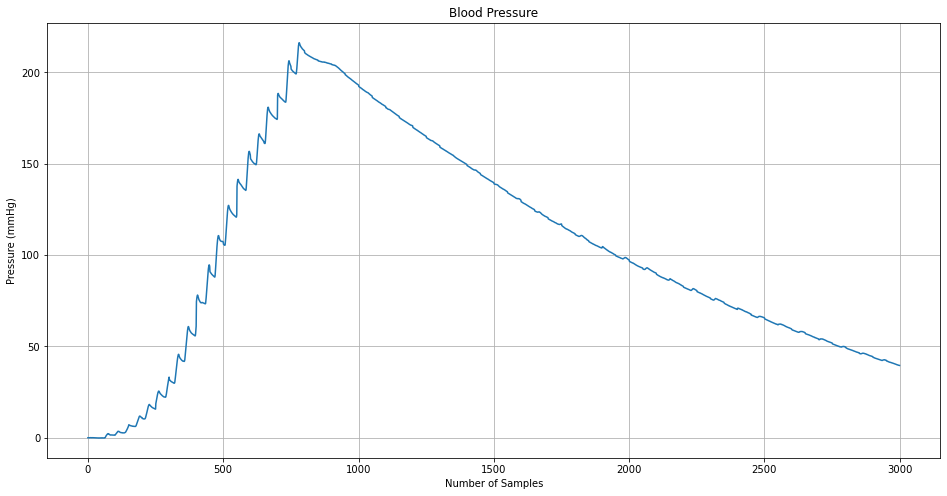

In [7]:
fig = plt.figure(figsize=(16, 8))
plt.plot(df)
plt.title('Blood Pressure')
plt.xlabel('Number of Samples')
plt.ylabel('Pressure (mmHg)')
plt.grid()

## Plot 2 - Filtered Blood Pressure

Applying a bandpass filter to the pressure dataframe and plotting the result.

In [8]:
# Defining functions for the butter bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [9]:
# Defining sampling and cutoff frequencies (Hz) for filter
fs = 100
lowcut = 0.5
highcut = 10

y = butter_bandpass_filter(df, lowcut, highcut, fs, order=3)

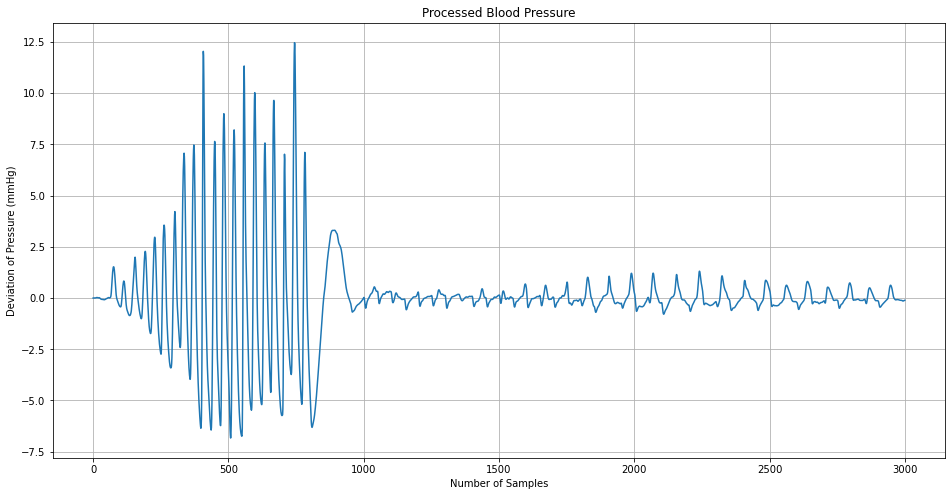

In [10]:
fig = plt.figure(figsize=(16, 8))
plt.plot(y)
plt.title('Processed Blood Pressure')
plt.xlabel('Number of Samples')
plt.ylabel('Deviation of Pressure (mmHg)')
plt.grid()

## Plot 3 - Systolic and Diastolic Pressure

Isolating the pressure change and calculating the systolic and diastolic values as the flow of blood starts pumping again.

Sample range for the pressure change may vary based on cuff inflation and deflation timing. Adjust `xMin` and `xMax` accordingly for accurate results.

In [11]:
# Defininig the range for pressure change and percentage of the max peak pressure for the systolic and diastolic pressure
sysMul = 0.5
diaMul = 0.8

xMin = 1500
xMax = 2500

y2 = (y)[xMin:xMax]

# Finding the systolic and diastolic pressure relative to the percentage of the max peak pressure
maximum = np.max(y2)
minimum = np.min(y2)

sysMax = np.argmax(y2 > maximum*sysMul)
diaMax = np.flatnonzero(y2 > maximum*diaMul)[-1]

sysVal = df[xMin + sysMax]
diaVal = df[xMin + diaMax]

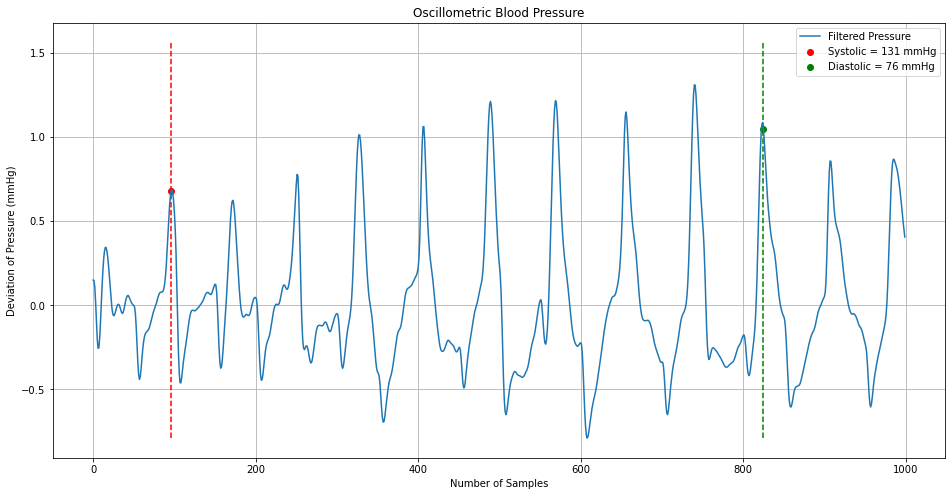

In [12]:
fig = plt.figure(figsize=(16, 8))
plt.plot(y2)

plt.scatter(sysMax, y[xMin + sysMax],color='r')
plt.scatter(diaMax, y[xMin + diaMax],color='g')

plt.vlines(sysMax, minimum, maximum + 0.25, colors='r', linestyles='dashed')
plt.vlines(diaMax, minimum, maximum + 0.25, colors='g', linestyles='dashed')

plt.legend(['Filtered Pressure', 'Systolic = {:.0f} mmHg'.format(sysVal), 'Diastolic = {:.0f} mmHg'.format(diaVal)])
plt.title('Oscillometric Blood Pressure')
plt.xlabel('Number of Samples')
plt.ylabel('Deviation of Pressure (mmHg)')
plt.grid()

## Plot 4 - Heart Rate

Measuring the time between peaks to calculate the heart rate. For this project it was estimated that it took approximately 30 seconds to read 3000 samples from the pressure sensor at a read/write wait time of 10ms. That makes it approximately 10 samples/sec. The formula is as followed,

<b>Heart Rate = (totalNumberOfSamples / AveragePeakDistanceSamples)*(60 / totalSamplesSeconds)</b>

In [13]:
# Definining the peaks of the plots and total samples used.
# For this project it was calculated that 3000 samples took approximately 30 seconds
# to be read from the sensor with a write/read wait time of 10 ms.
allPeaks, _ = find_peaks(y2, height=0.25)

total = 0
nSamp = 3000
peakLen = len(allPeaks)

# Calculating the average peak distance and heart rate
if (peakLen % 2 == 1):
    peakLen -= 1
    
for i in range(peakLen - 1):
    total += allPeaks[i + 1] - allPeaks[i]
    
peakPerSamp = total / (peakLen - 1)

beatsPerMin = (nSamp / peakPerSamp)*2

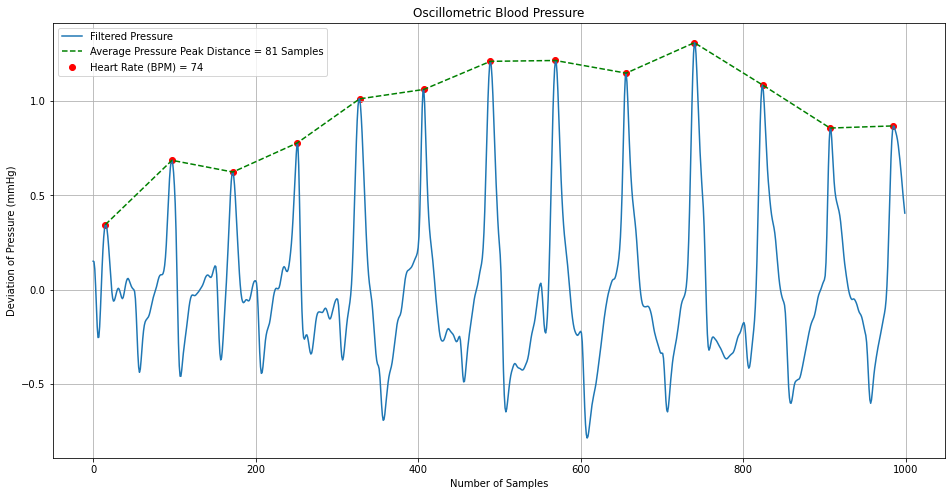

In [14]:
fig = plt.figure(figsize=(16, 8))
plt.plot(y2)
plt.scatter(allPeaks, y[xMin + allPeaks], color='r')
plt.plot(allPeaks, y[xMin + allPeaks], '--', color='g')

plt.legend(['Filtered Pressure', 'Average Pressure Peak Distance = {:.0f} Samples'.format(peakPerSamp),
            'Heart Rate (BPM) = {:.0f}'.format(beatsPerMin)])
plt.title('Oscillometric Blood Pressure')
plt.xlabel('Number of Samples')
plt.ylabel('Deviation of Pressure (mmHg)')
plt.grid()